# Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
murder = pd.read_csv('32_Murder_victim_age_sex.csv')
murder.Year.unique()
murder.Area_Name.unique()
murder.Sub_Group_Name.unique()
murder.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,NaN,NaN,NaN,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


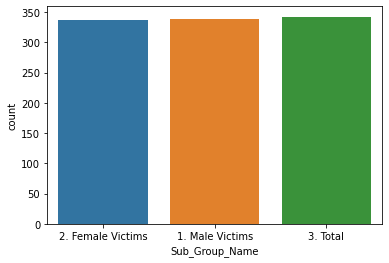

In [3]:
sns.countplot(murder['Sub_Group_Name'])

# Murder Victims Per Year

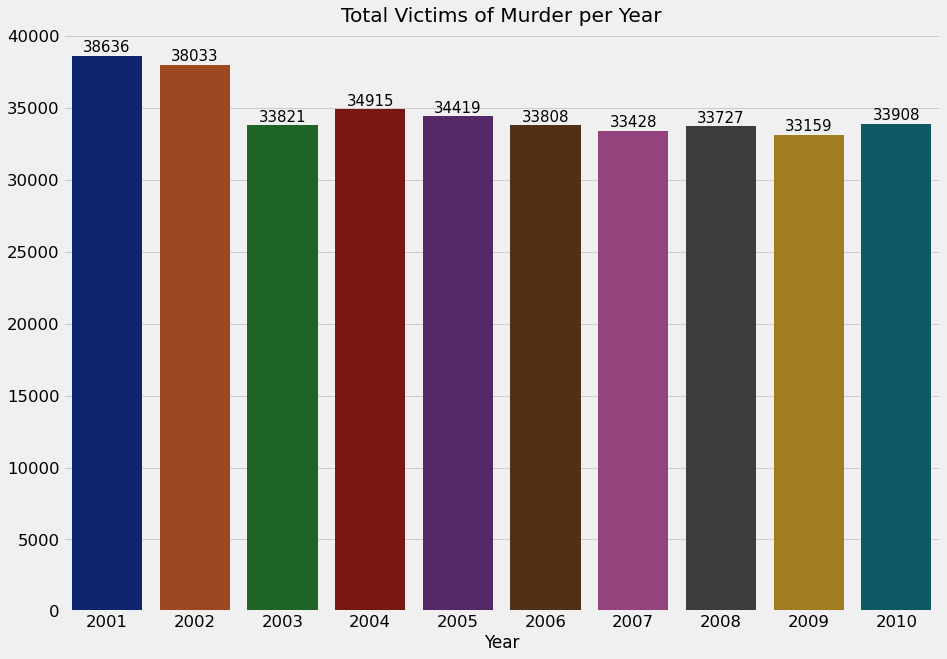

In [4]:
murdert = murder[murder['Sub_Group_Name']== '3. Total']  #keeping only total category of subgroup
murdery = murdert.groupby(['Year'])['Victims_Total'].sum().reset_index() #grouping
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'Victims_Total' , data = murdery ,palette= 'dark') #plotting bar graph
plt.title("Total Victims of Murder per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')


Inference : We can see that the no. of victims is gradually decresing over the years.

# Gender of the victims

Text(0, 0.5, '')

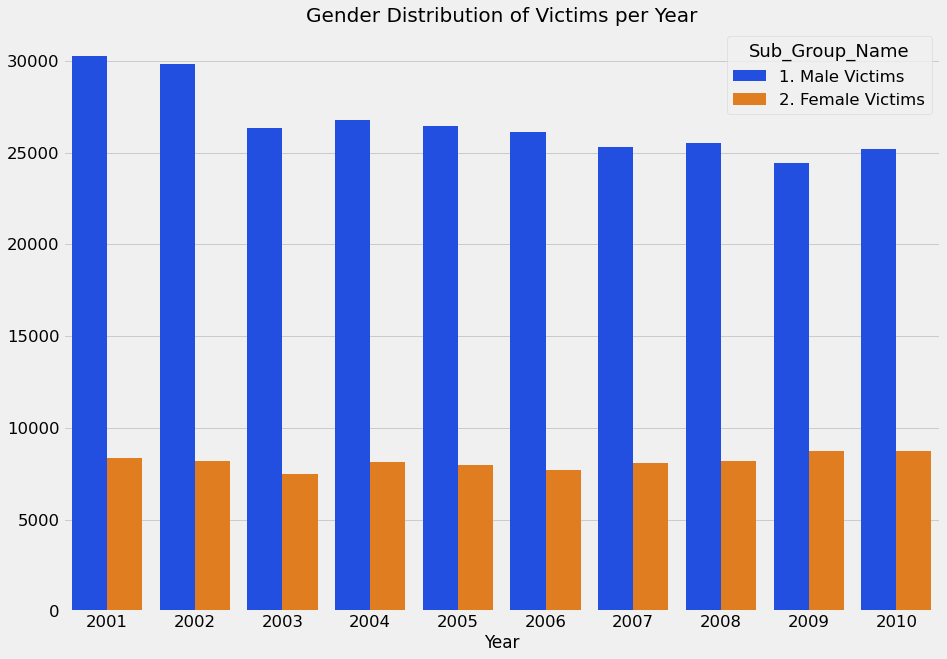

In [5]:
murderg = murder.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index() # grouping with year and sub group
murderg = murderg[murderg['Sub_Group_Name']!= '3. Total'] 

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot( x = 'Year', y = 'Victims_Total' , hue = 'Sub_Group_Name' , data = murderg ,palette= 'bright')
plt.title('Gender Distribution of Victims per Year',size = 20)
ax.set_ylabel('')

Inference: Males are more prone to be murder victim as compared to women . Over the years the number of male victims has decreased but the number of female victims is almost same as the previous years.

# Age of the victim

Text(0, 0.5, '')

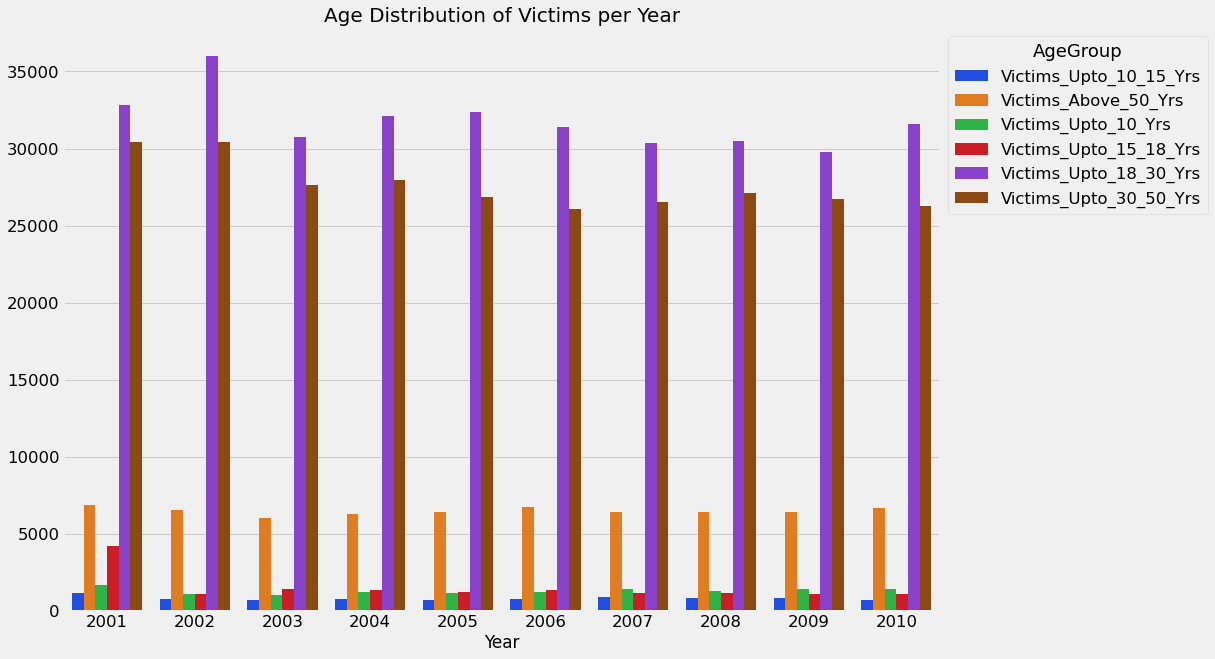

In [6]:
murdera = murder.groupby(['Year'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs',
                                   'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                   'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index()  #grouby year and age group
murdera = murdera.melt('Year', var_name='AgeGroup',  value_name='vals') #melting the dataset

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = murdera ,palette= 'bright')
plt.title('Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.set_ylabel('')

Inference: Compared to people of other ages the age group 18 - 30 years is more prone to be victim of the murder. The rise in 2002 numbers is maybe due to the riots of gujrat . Another age group which is most likely to be victim of murder is 30 - 50. Compared to these two groups other age groups are very small in number. From all the groups children are most likely to be safe.

# Age & Gender of the victim

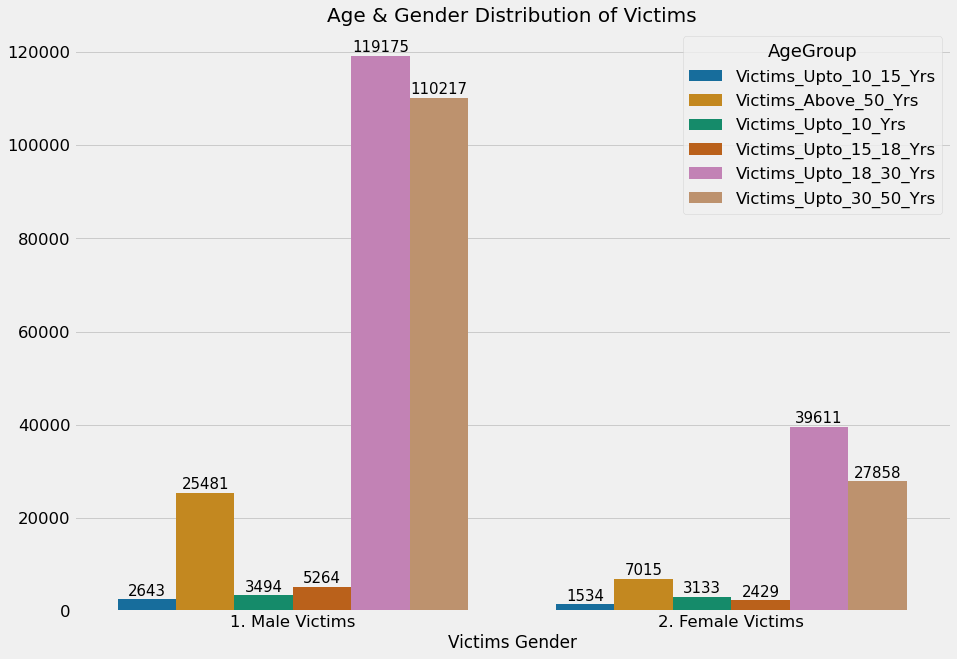

In [7]:
murderag = murder.groupby(['Sub_Group_Name'])['Victims_Upto_10_15_Yrs',
                                              'Victims_Above_50_Yrs', 'Victims_Upto_10_Yrs',
                                              'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs',
                                              'Victims_Upto_30_50_Yrs',].sum().reset_index()

murderag = murderag.melt('Sub_Group_Name', var_name='AgeGroup',  value_name='vals')  #melting the dataset for drawing the desired plot
murderag= murderag[murderag['Sub_Group_Name']!= '3. Total']

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Sub_Group_Name' , y = 'vals',hue = 'AgeGroup' ,data = murderag,palette= 'colorblind') 
plt.title('Age & Gender Distribution of Victims',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) 
ax.set_ylabel('')
ax.set_xlabel('Victims Gender')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

Inference: Males of age 18-30 are more likely to be get killed as compared to the any of the age-gender group. After them male of 30-50 are prone to be victim of murder. Similar to male age groups females of age 18-30 are more likely to be get killed .

# Murders: Statewise

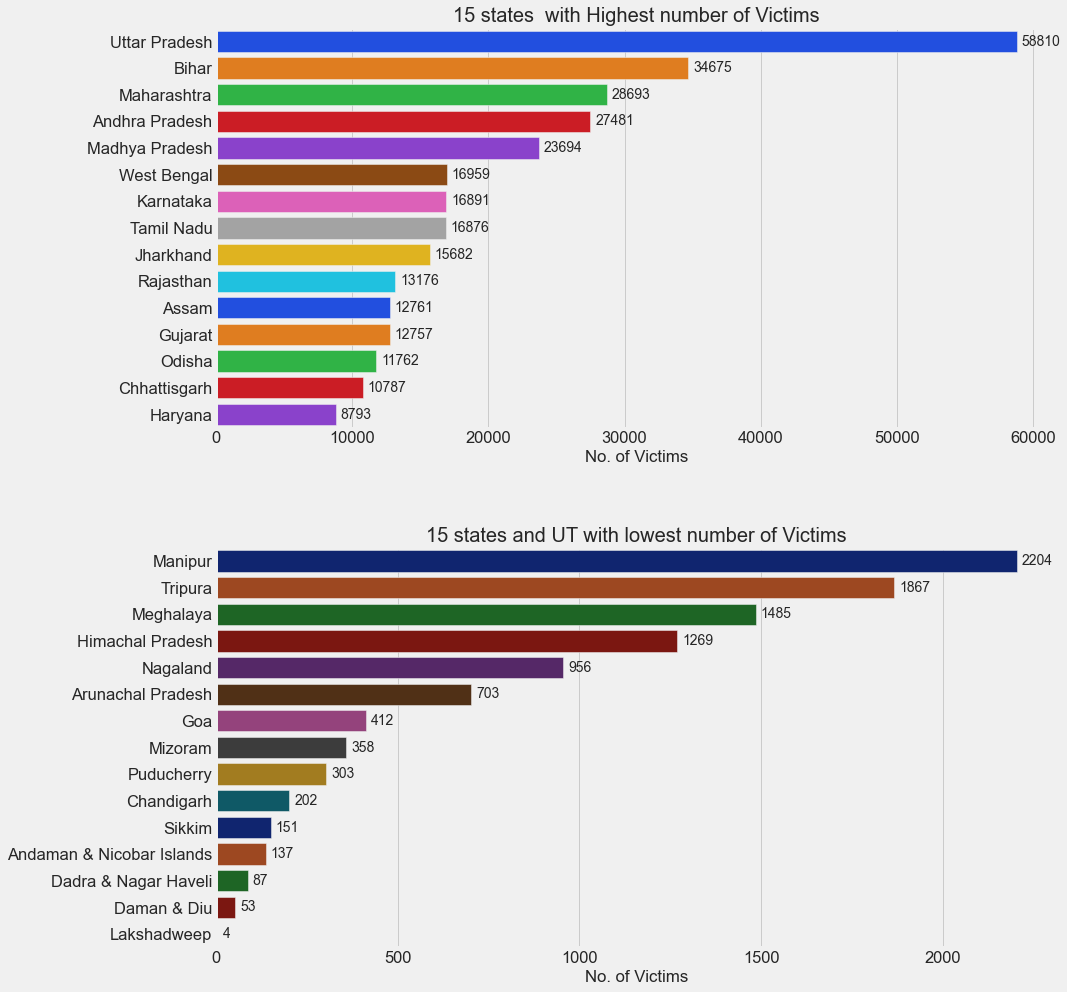

In [8]:
murders = murder[murder['Sub_Group_Name']== '3. Total'] 
murders= murders.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
 
murdersbad = murders.head(15) #top highest states
murdersgood = murders.tail(15) #top lowest states/ut

#sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

f , axes = plt.subplots(2,1, figsize = (15,14))
ax = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = murdersbad, ax = axes[0],palette= 'bright') 
axes[0].set_title("15 states  with Highest number of Victims", size = 20)
axes[0].set_ylabel('')
axes[0].set_xlabel('No. of Victims')
ax1 = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = murdersgood, ax = axes[1],palette= 'dark' )
axes[1].set_title("15 states and UT with lowest number of Victims", size = 20)
axes[1].set_ylabel('')
axes[1].set_xlabel('No. of Victims')
plt.tight_layout()  
plt.subplots_adjust(hspace= .3) 

for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

for p in ax1.patches:
        ax1.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

Inference: With almost 60000 murders Uttarpradesh has highest victims of murder. Bihar has second highest number of victims which has less than 25000 victims than Uttarpradesh. Interestingly Uttarpradesh has the highest population in the country. Bihar has less population than maharashtra still it has higher number of victims than Maharashtra.

Union Territory Lakshadweep has lowest number of Murder Victims. Factors like population of the state and Population density might be responsible for the number of murder victims in the state.

Gender Distribution of victims per state

Text(0.5, 1.0, 'Gender Distribution of Victims per State')

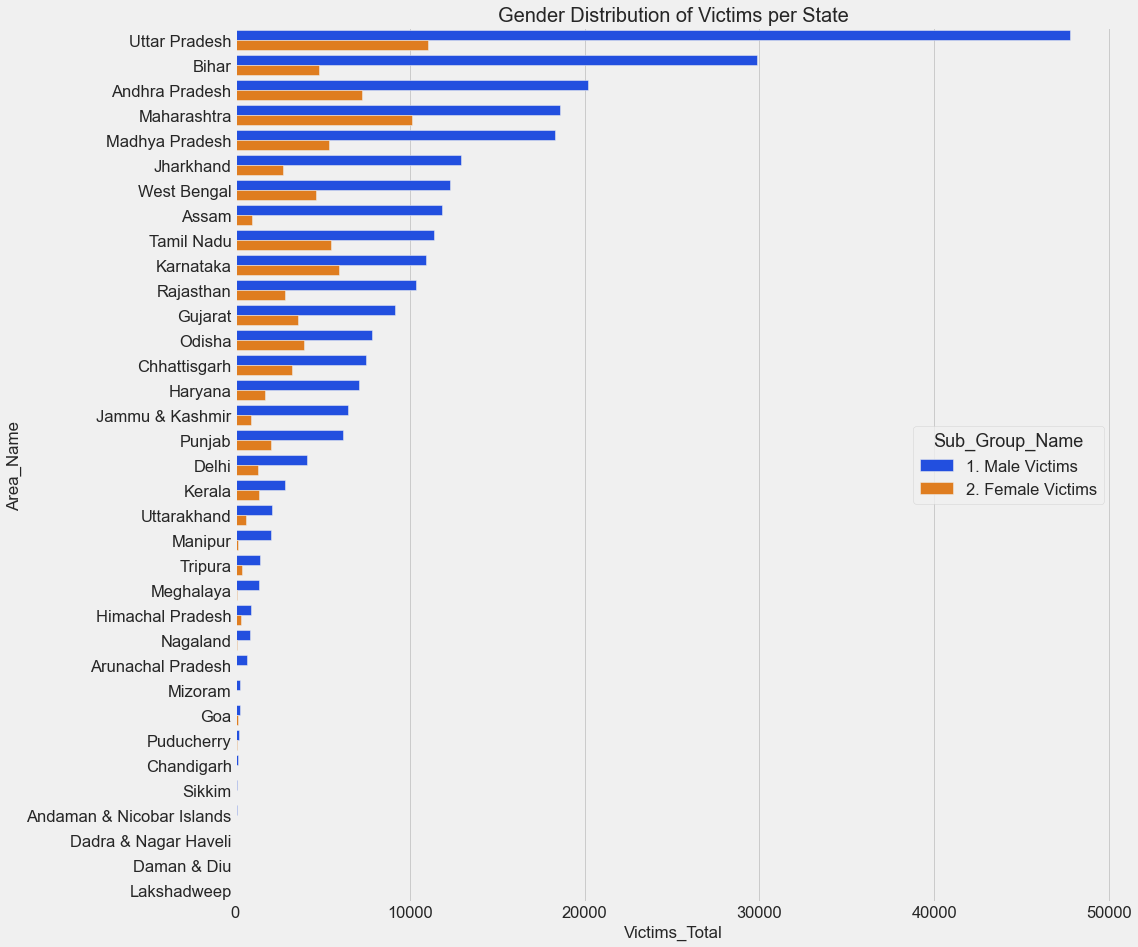

In [9]:
murdergs = murder.groupby(['Area_Name' , 'Sub_Group_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index() #groupby state and gender
murdergs = murdergs[murdergs['Sub_Group_Name']!= '3. Total'] 
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
sns.barplot( x = 'Victims_Total', y = 'Area_Name' , hue = 'Sub_Group_Name' , data = murdergs,palette= 'bright') 
plt.title('Gender Distribution of Victims per State',size = 20)

Inference : Similar to above results males are more likely to be get murdered as compared to females. Interesting thing to notice in this graph is Mahrashtra has second highest female victims.

Statewise Distribution of victims according to their age

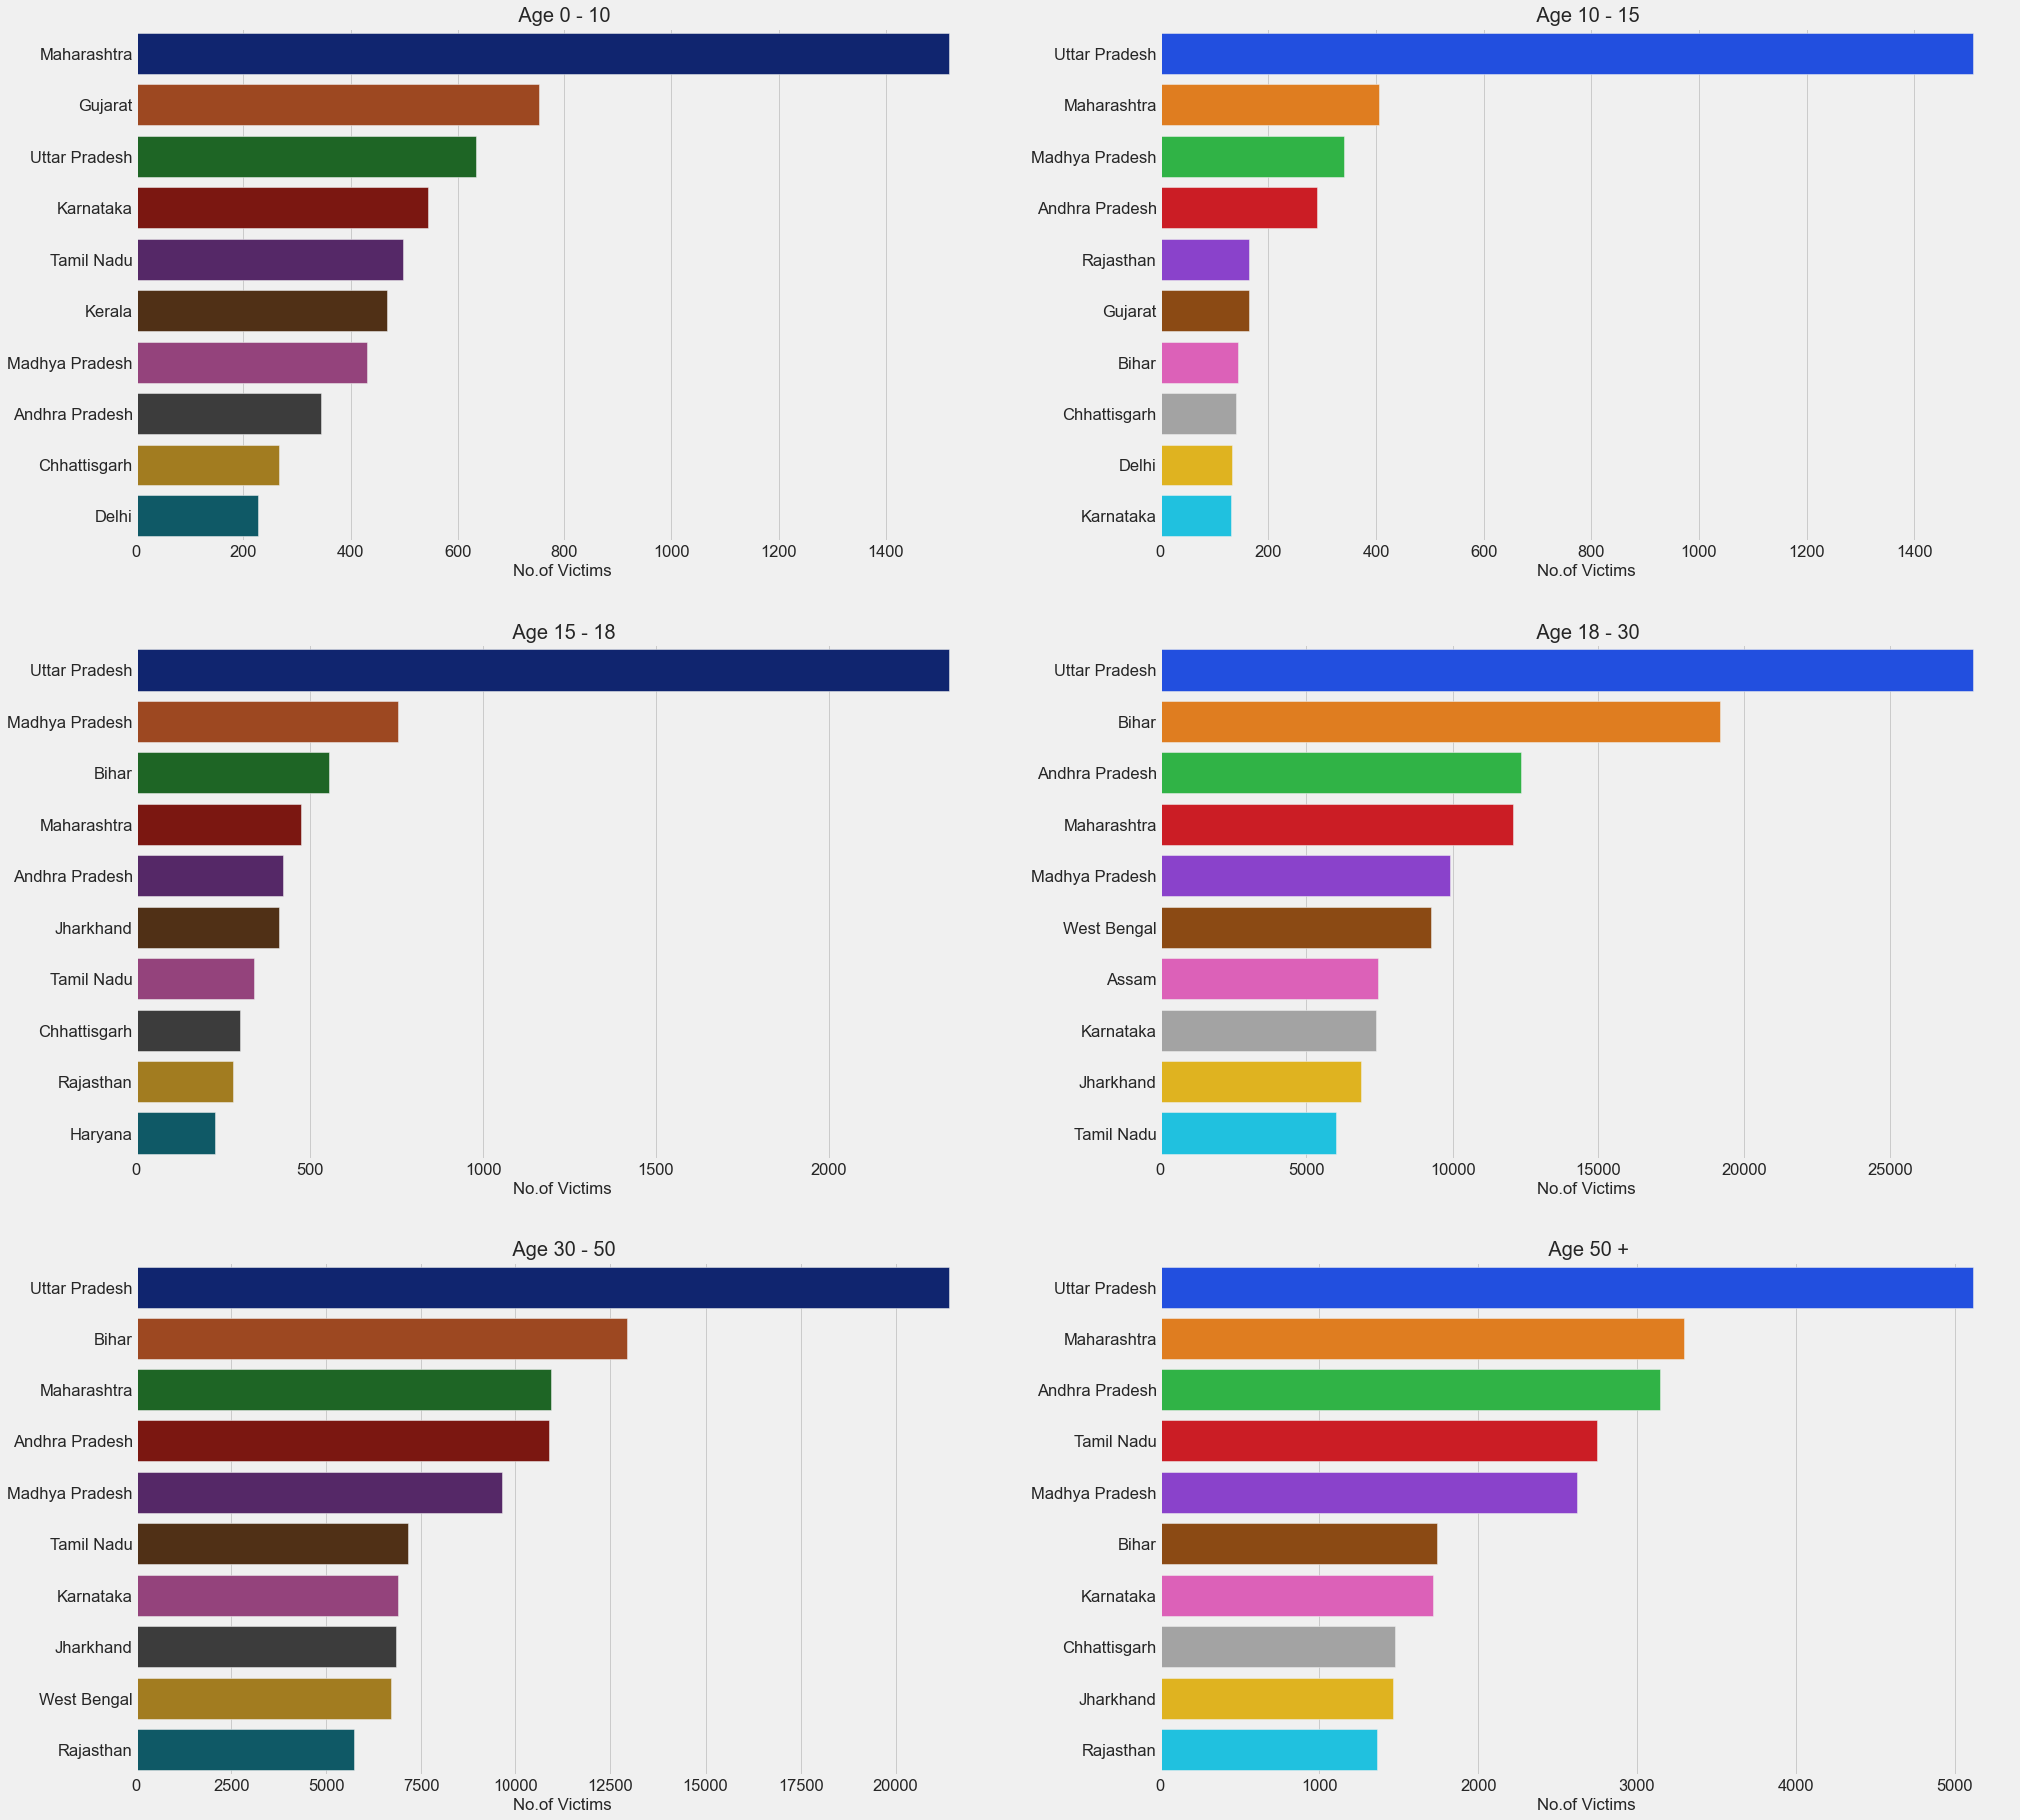

<Figure size 1008x1080 with 0 Axes>

In [10]:
murdernt = murder[murder['Sub_Group_Name']== '3. Total']
murdersa = murdernt.groupby(['Area_Name'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs', 
                                           'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                           'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index() 
murdersa = murdersa.melt('Area_Name', var_name='AgeGroup',  value_name='vals') 

sns.set_style("darkgrid")
sns.set_context("talk")
plt.style.use("fivethirtyeight")


f, axes = plt.subplots(3,2, figsize = (30,30))
plt.figure(figsize = (14,15))
sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[0,0],palette= 'dark')
axes[0,0].set_title(' Age 0 - 10', size = 20)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('No.of Victims')

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_15_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[0,1],palette= 'bright' )
axes[0,1].set_title(' Age 10 - 15', size = 20)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('No.of Victims')    


sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_15_18_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[1,0],palette= 'dark')
axes[1,0].set_title(' Age 15 - 18', size = 20)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_18_30_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[1,1],palette= 'bright' )
axes[1,1].set_title(' Age 18 - 30', size = 20)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_30_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[2,0],palette= 'dark')
axes[2,0].set_title(' Age 30 - 50', size = 20)
axes[2,0].set_ylabel('')
axes[2,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Above_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[2,1],palette= 'bright')
axes[2,1].set_title(' Age 50 +', size = 20)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('No.of Victims')  
plt.tight_layout()


Inference : Uttarpradesh has the highest number of murder victims in all age group except age group 0 - 10 , Surprisingly Maharashtra has the highest child victims and Gujrat ranks second in case of child victims. Assam is the only north eastern state which comes under these graphs.

# Conclusion

Although country level murder rate is decreasing slowly over the years. State like Uttarpradesh , Bihar , Mahrashtra , West Bengal has the high number of victims over the years. The male age group of 18-30 is most unsafe. So if you belong to this age group Be Safe.

# Caste Crimes : Crimes Against SC

In [11]:
sc = pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')


In [12]:
sc['STATE/UT'] = sc['STATE/UT'].str.capitalize()
sc['DISTRICT'] = sc['DISTRICT'].str.capitalize()


sc['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

In [13]:
sc.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,Andhra pradesh,Adilabad,2001,0,1,4,0,0,0,3,0,15,32
1,Andhra pradesh,Anantapur,2001,0,4,0,0,0,0,49,21,0,53
2,Andhra pradesh,Chittoor,2001,3,3,0,0,0,0,38,36,0,34
3,Andhra pradesh,Cuddapah,2001,0,3,0,0,0,0,20,52,0,25
4,Andhra pradesh,East godavari,2001,1,3,0,0,0,0,3,12,63,7


In [14]:
yearw = sc[sc.DISTRICT == 'Total']
yearw = yearw.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()
yearw['sum'] = yearw.drop('Year', axis=1).sum(axis=1)
yearw = yearw[['Year','sum']]

In [15]:
scy = sc[sc.DISTRICT == 'Total']
scy = scy.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

crimes = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']


# Crime Over The Years

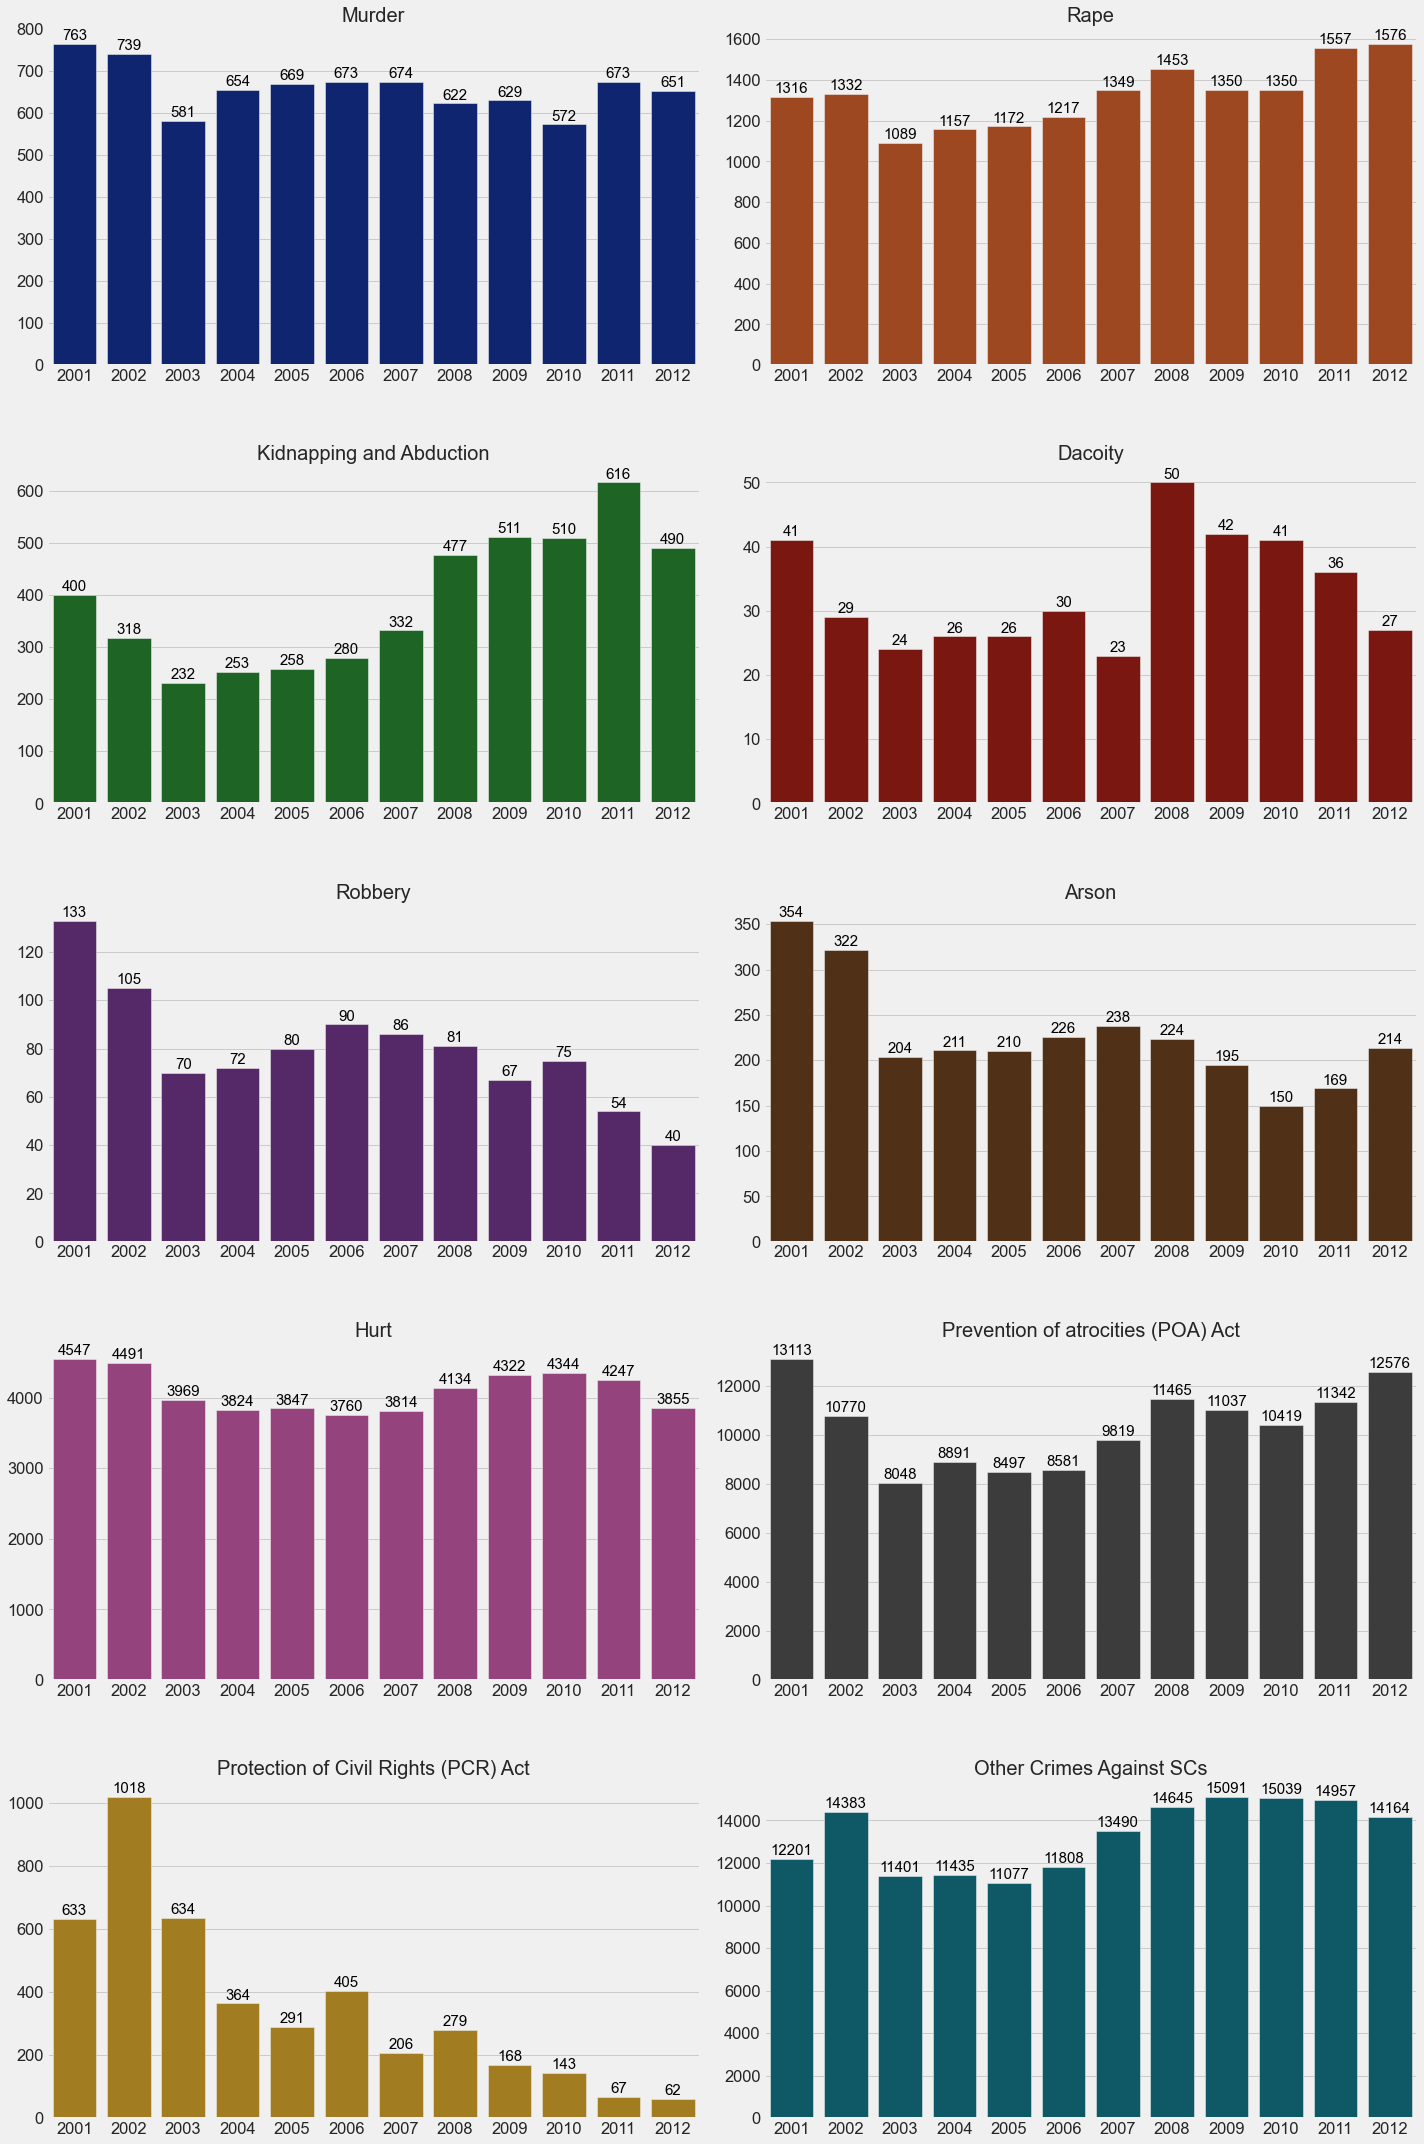

In [16]:
scy2 = sc[sc.DISTRICT == 'Total']
scy2 = scy2.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

#Plotting Graphs
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
columns = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scy2,x='Year',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
    
plt.tight_layout()

plt.subplots_adjust(hspace= .3)
plt.show()

In [17]:
scy = scy.append(scy.sum().rename('total'))
scy['Year'].replace(26091, 'Total', inplace=True)
scy = scy[scy['Year'] == 'Total']
scy_t = scy.T.reset_index()
scy_t

,index
0,Year
1,Murder
2,Rape
3,Kidnapping and Abduction
4,Dacoity
5,Robbery
6,Arson
7,Hurt
8,Prevention of atrocities (POA) Act
9,Protection of Civil Rights (PCR) Act


In [18]:
stateyr = sc[sc.DISTRICT == 'Total']
stateyr = stateyr.groupby(['Year','STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

In [19]:
stateyr['sum'] =  stateyr.iloc[:, 2:].sum(axis=1)

In [20]:
stateyr2 = stateyr.groupby('STATE/UT')['sum'].sum().reset_index()

In [21]:
stateyr2 = stateyr2.sort_values('sum', ascending = False)

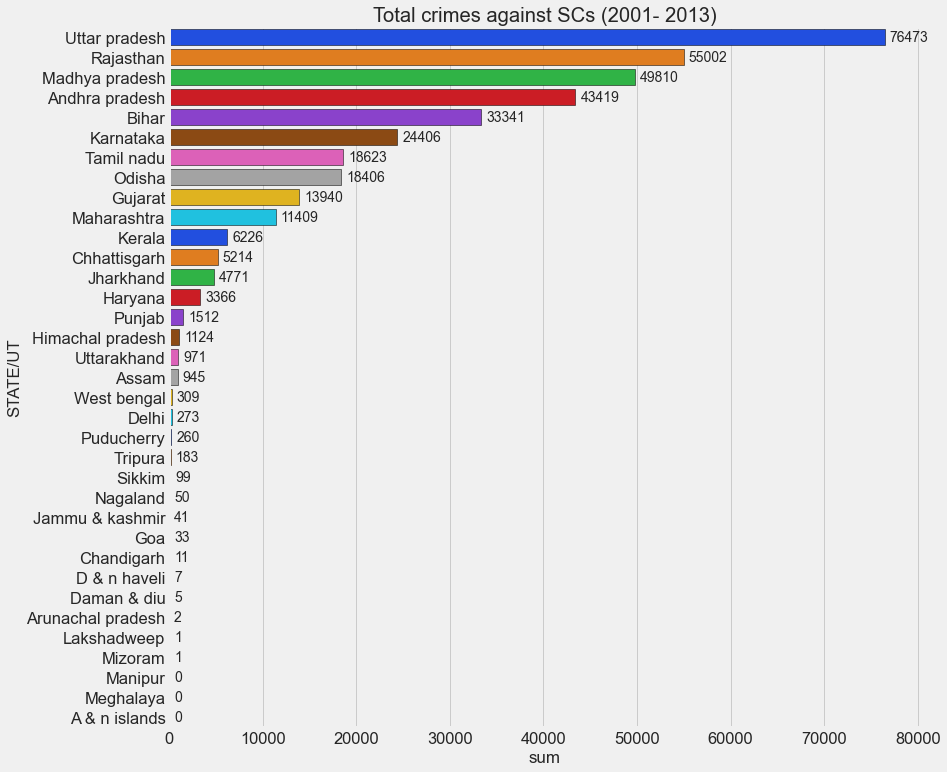

In [22]:
plt.figure(figsize = (12,12))
sns.set_context("talk")
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'sum', y = 'STATE/UT', data = stateyr2, palette = 'bright', edgecolor = 'black')
plt.title('Total crimes against SCs (2001- 2013)')
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

Uttarpradesh , Rajasthan , Madhyapradesh , Andhrapradesh , Bihar , Karnatka , Odisha , Tamilnadu , Gujrat , Maharashtra has the more number of cases of crime against SC. Lets see the crimes in these states yearwise.

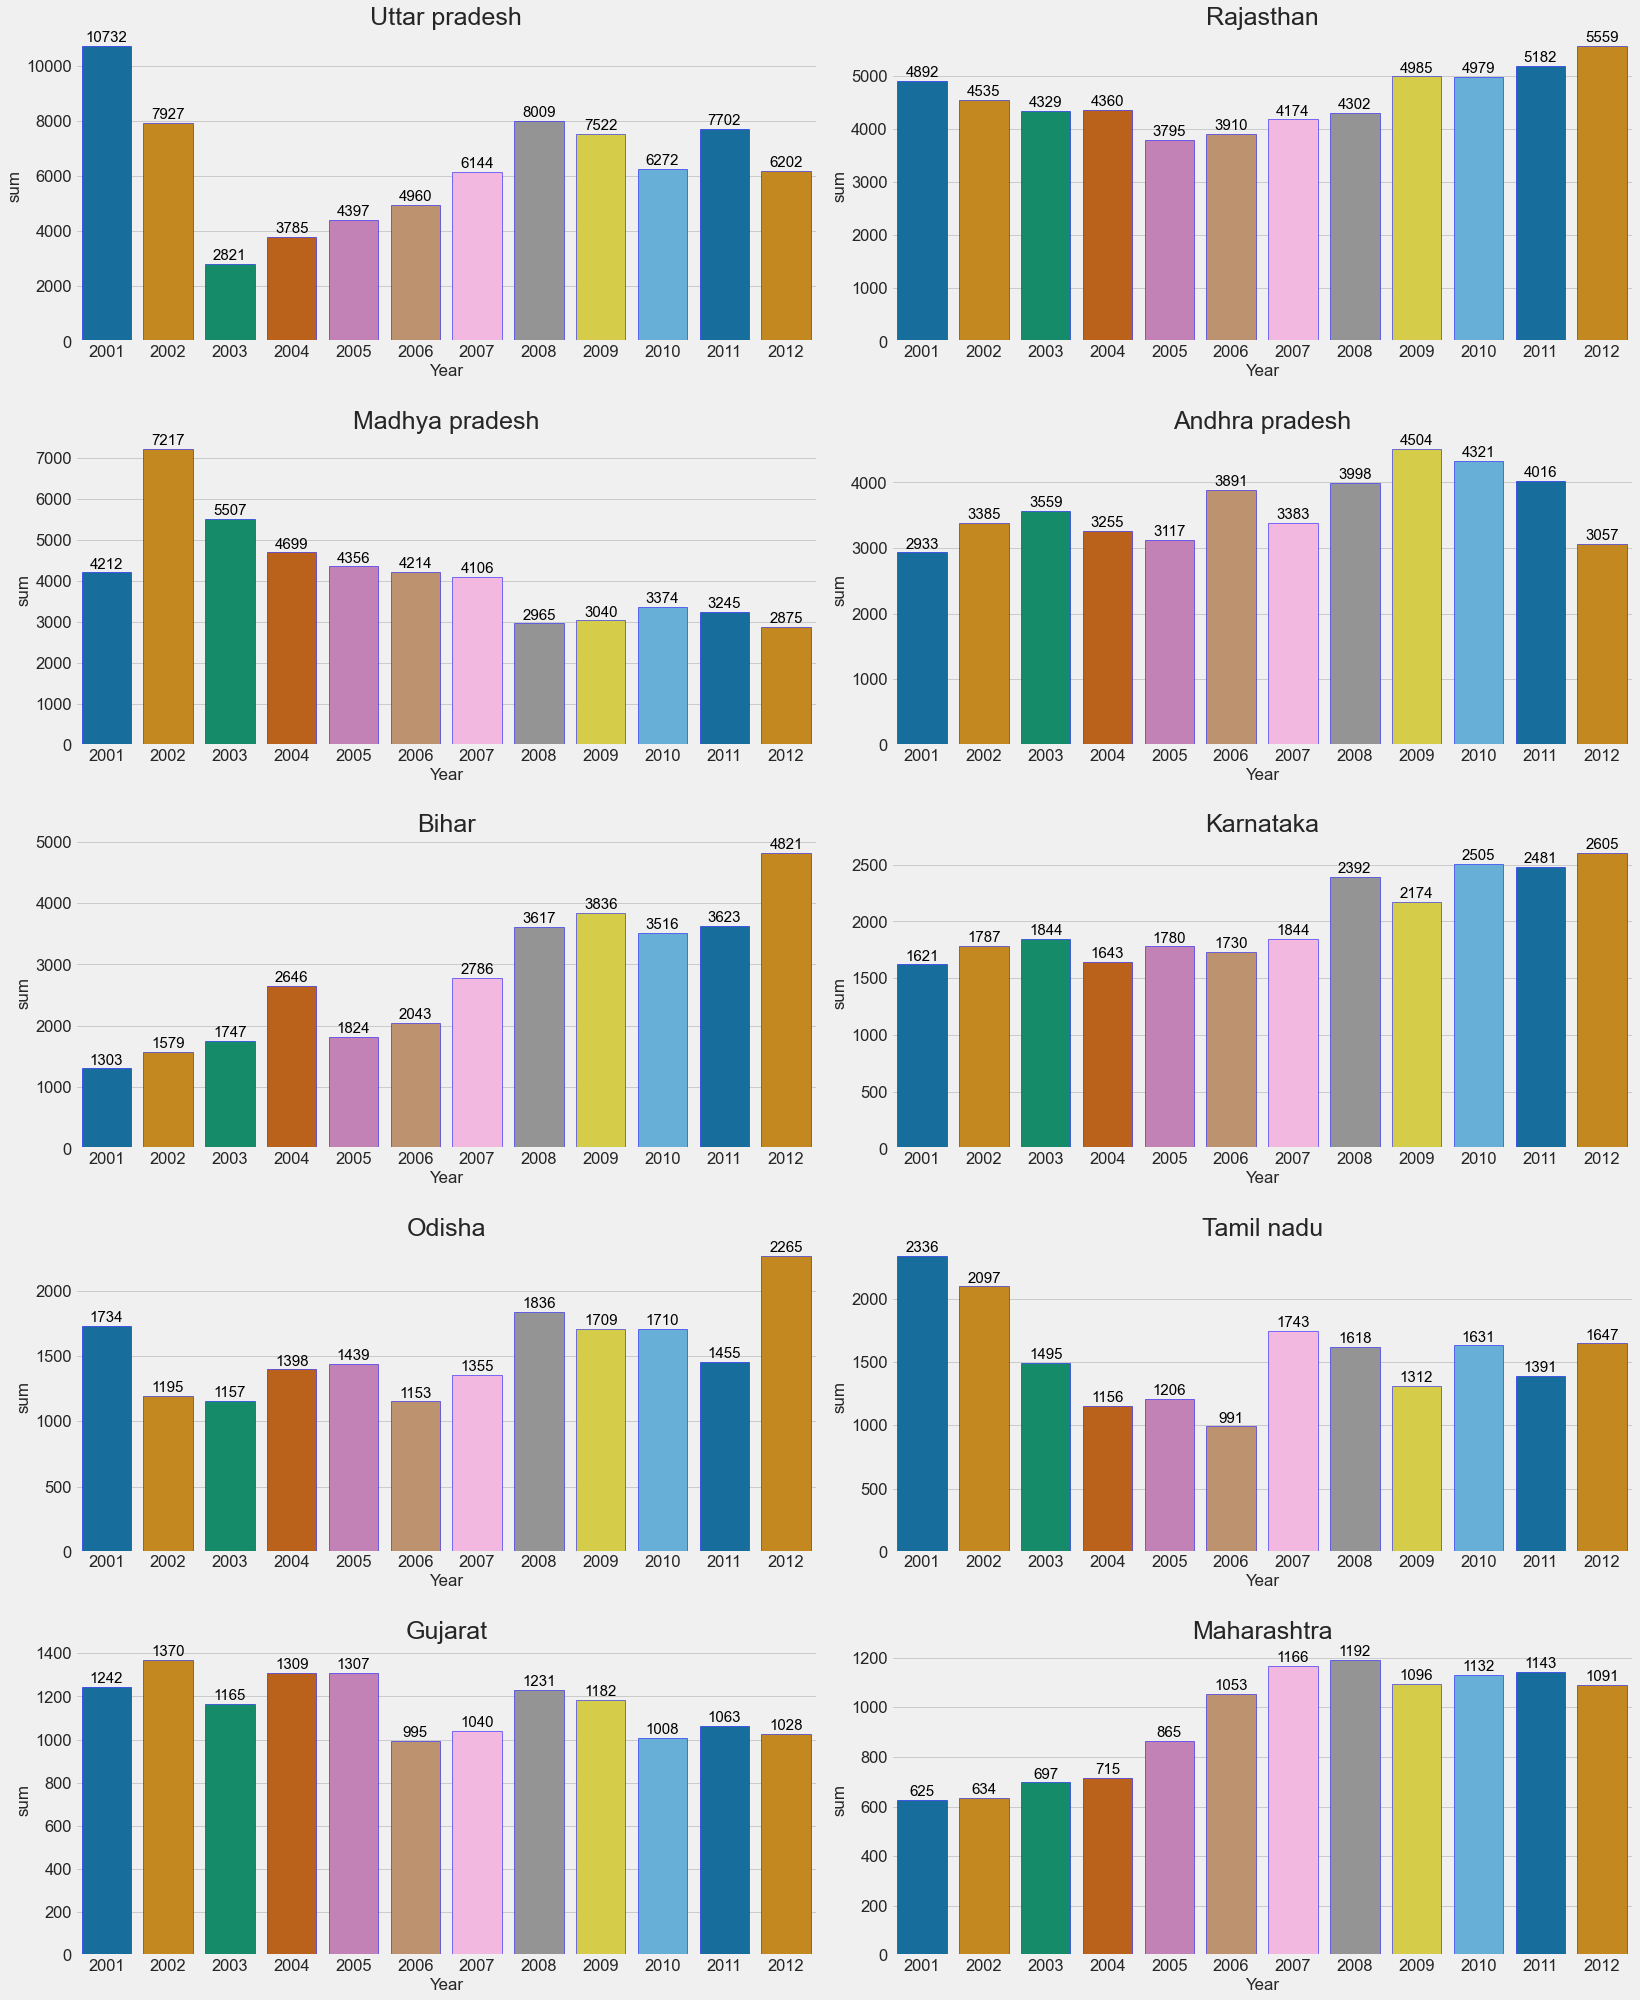

In [23]:
states = ['Uttar pradesh','Rajasthan' ,'Madhya pradesh' , 'Andhra pradesh', 'Bihar', 'Karnataka' , 'Odisha' , 'Tamil nadu','Gujarat', 'Maharashtra']
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (23,28))

for i, s in enumerate(states):
    plt.subplot(5,2,i+1)
    stateyr3 = stateyr[stateyr['STATE/UT'] == s]
    ax = sns.barplot(x = 'Year' , y = 'sum' , data = stateyr3,ci=None , palette = 'colorblind' , edgecolor = 'blue')
    plt.title(s , size = 25)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace= .3)

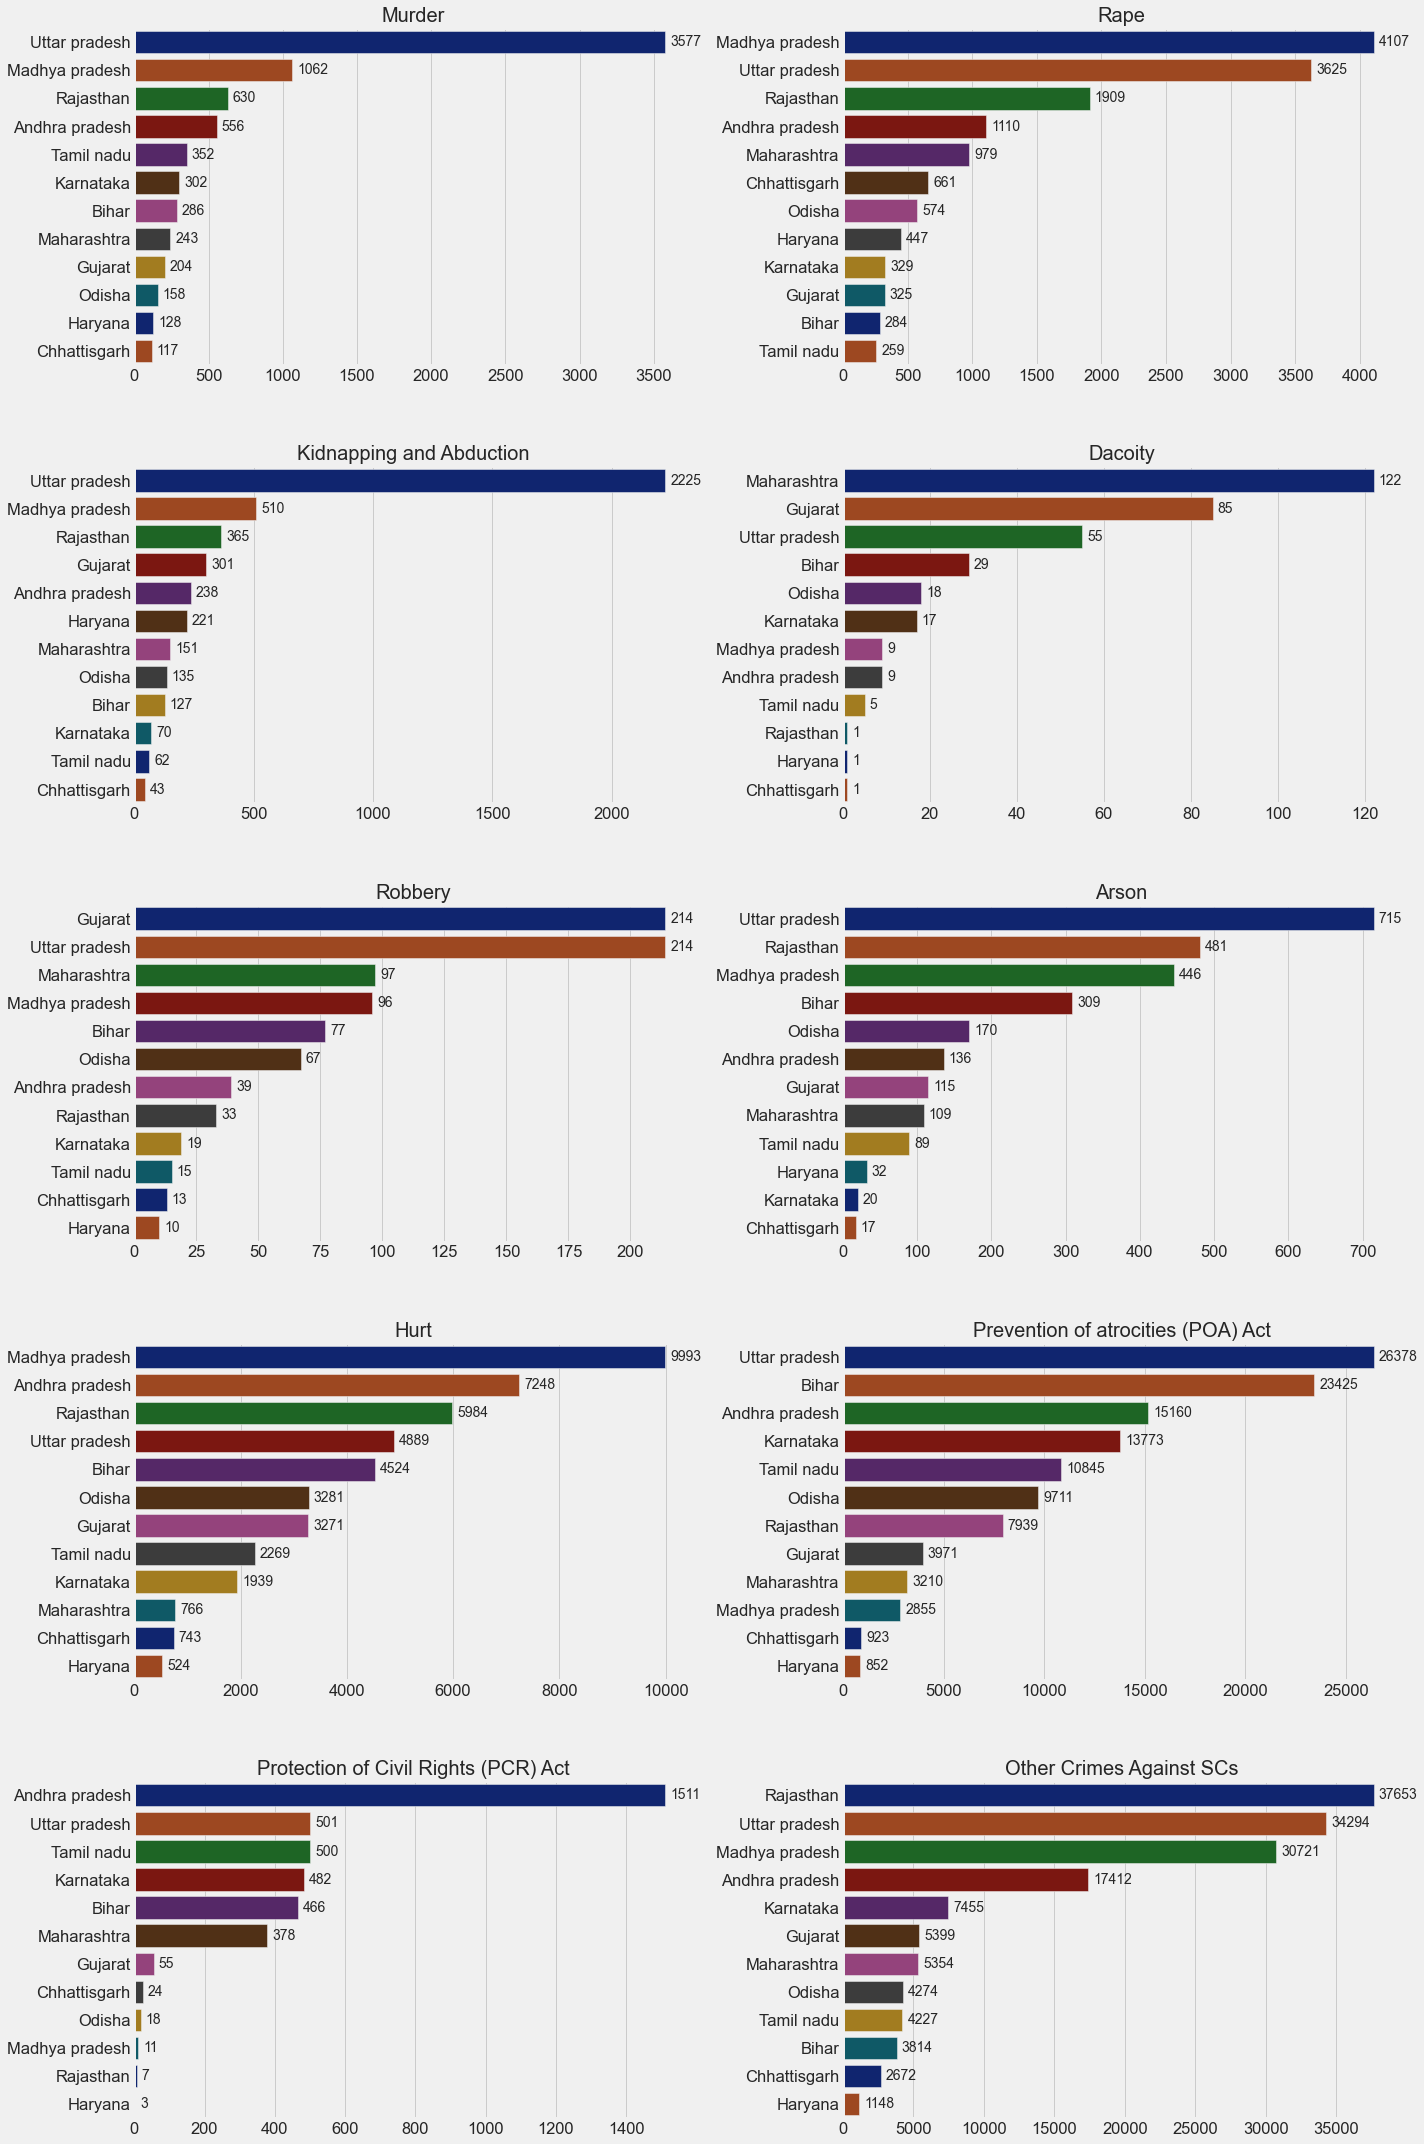

In [24]:
scs = sc[sc.DISTRICT == 'Total']
scs = scs.groupby(['STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

scs1 = scs[(scs.Murder > 100) & (scs.Rape > 100)]
sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scs1 = scs1.sort_values(column,ascending = False)
    plt.subplot(5,2,i+1)
    ax = sns.barplot(data= scs1,x= column ,y='STATE/UT',palette = 'dark' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
   
    
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

Statewise graphs shows that Uttarpradesh , Rajasthan , Maharashtra and Madhyapradesh are the states where the number of reported cases of violence against scheduled caste is higher .



# Crime Against SCs District Wise

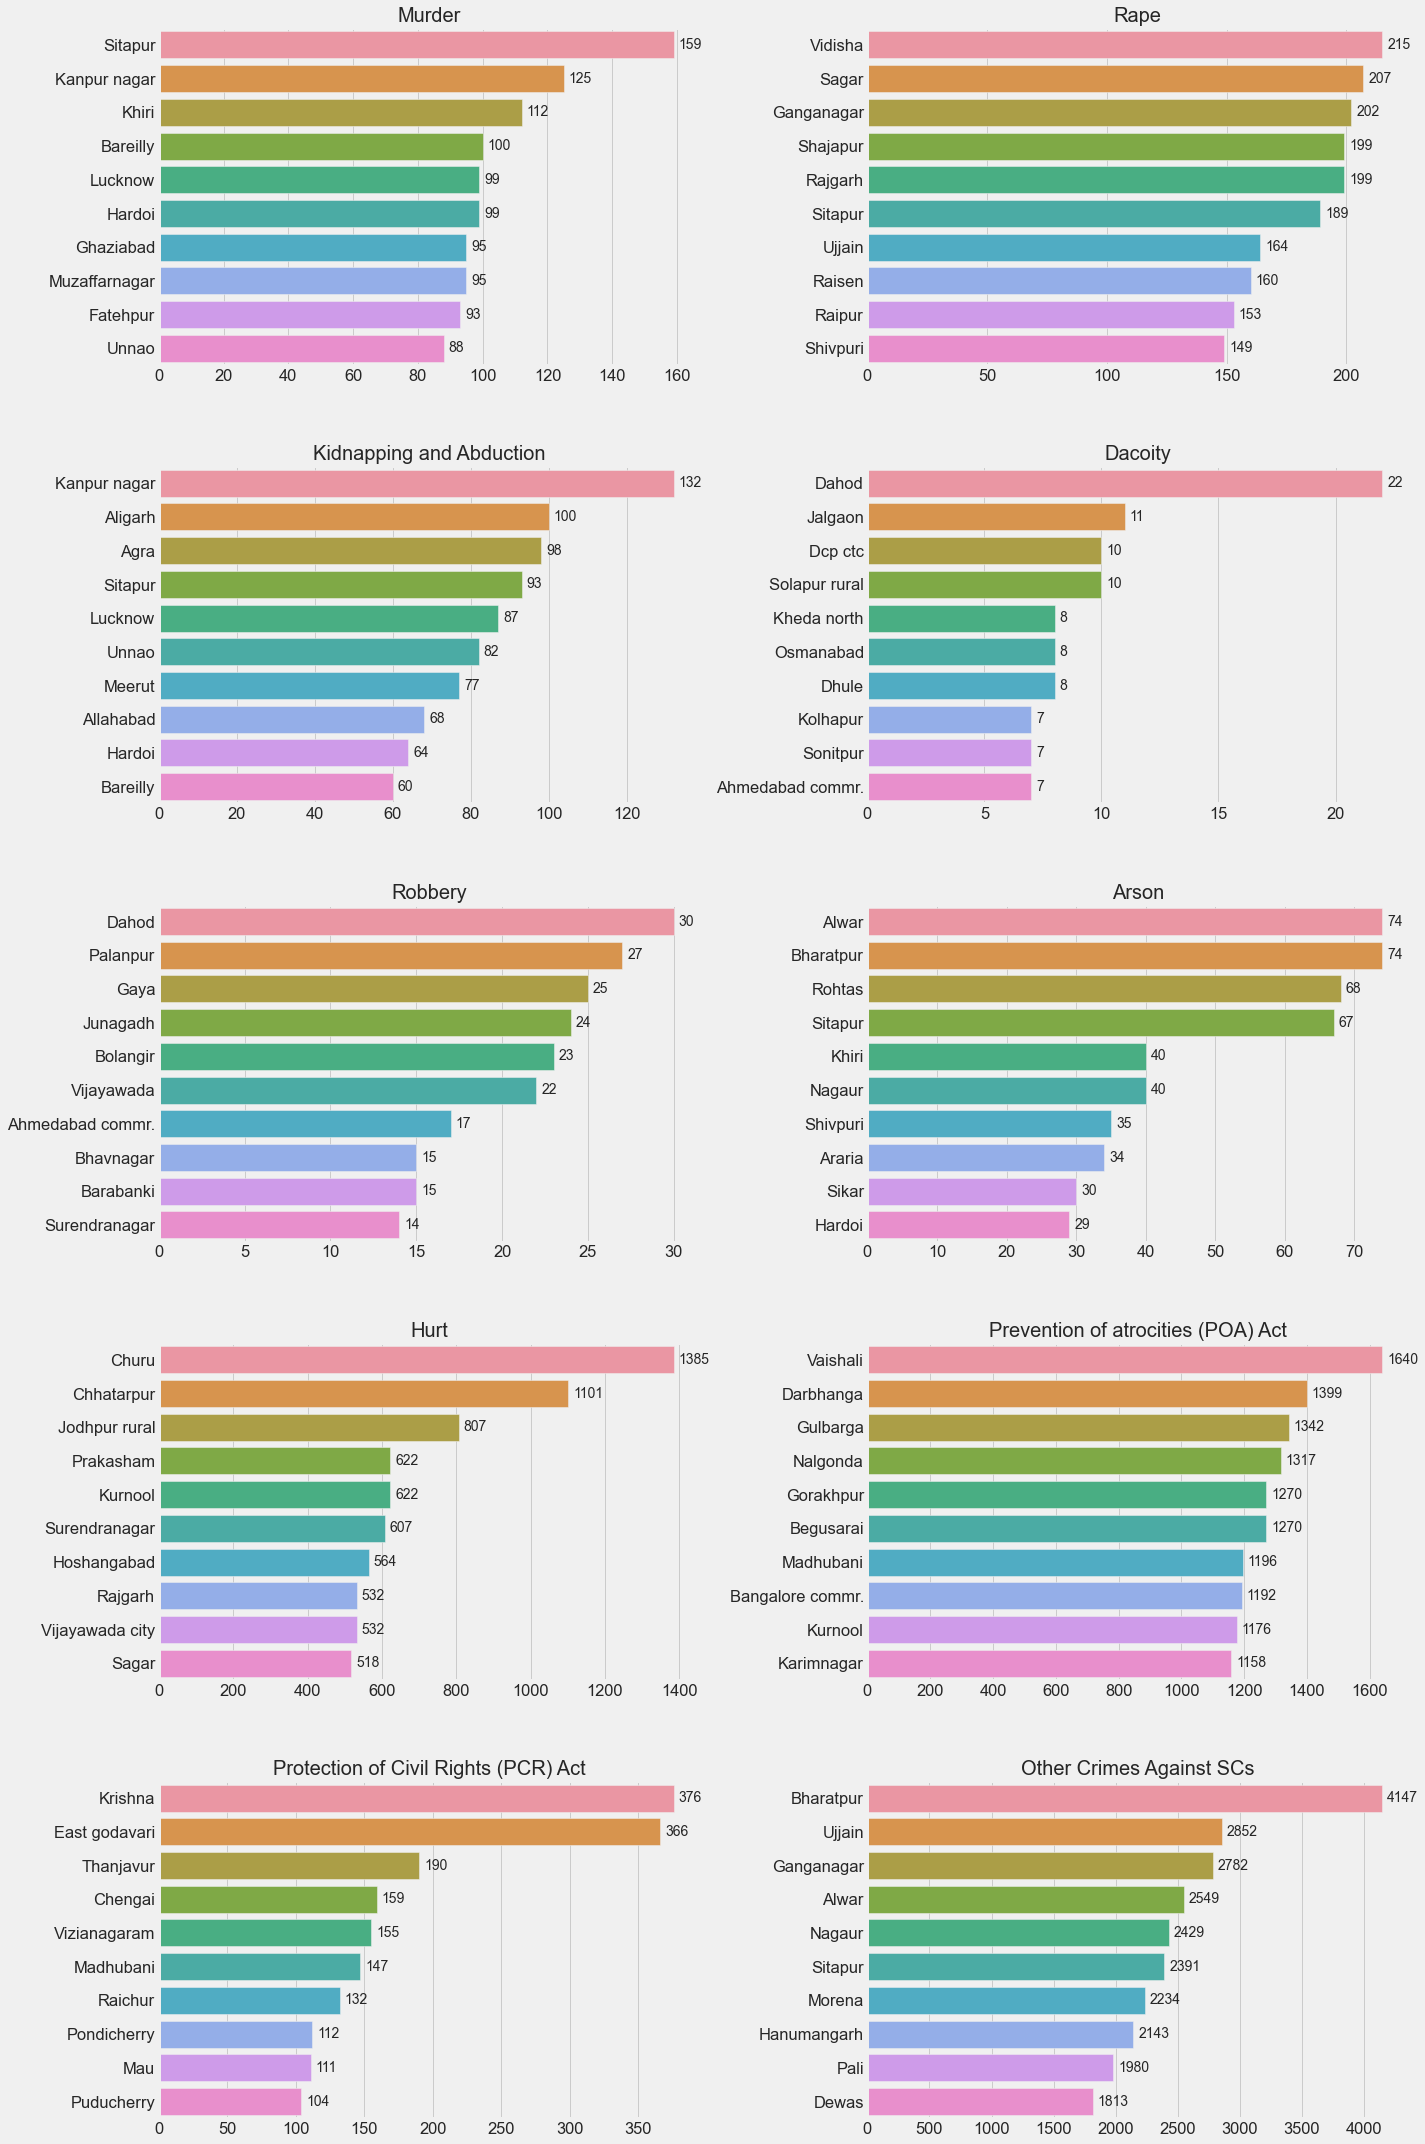

In [25]:
scd = sc[sc.DISTRICT != 'Total']
scd = scd.groupby(['DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scd1 = scd.sort_values(column,ascending = False)
    scd1 = scd1.head(10)
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scd1,x= column ,y='DISTRICT' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Number of Rape cases in 6 States

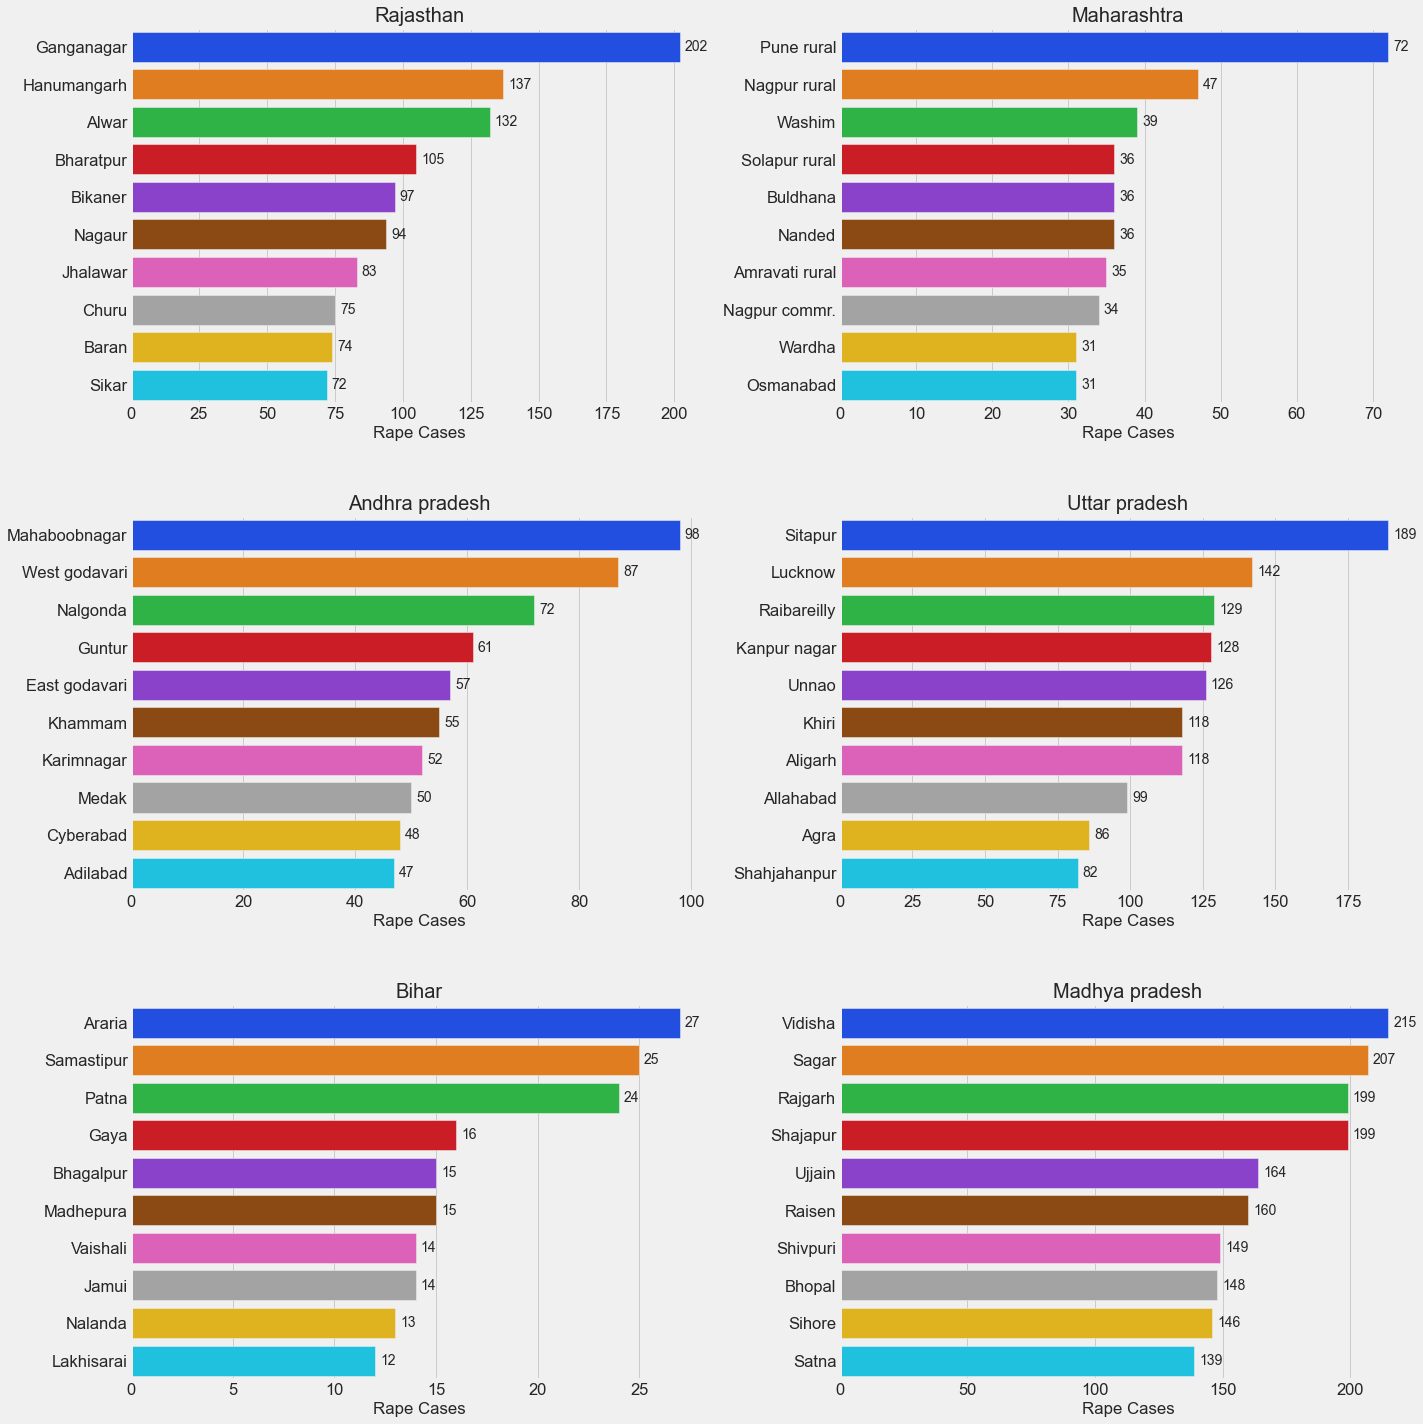

In [26]:
scsd = sc[sc.DISTRICT!= 'Total']
scsd = scsd.groupby(['STATE/UT', 'DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


states = ['Rajasthan', 'Maharashtra', 'Andhra pradesh', 'Uttar pradesh', 'Bihar','Madhya pradesh']
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Rape', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Rape' ,y= 'DISTRICT',palette = 'bright' )
    plt.xlabel('Rape Cases')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Number of cases of murder in 6 states

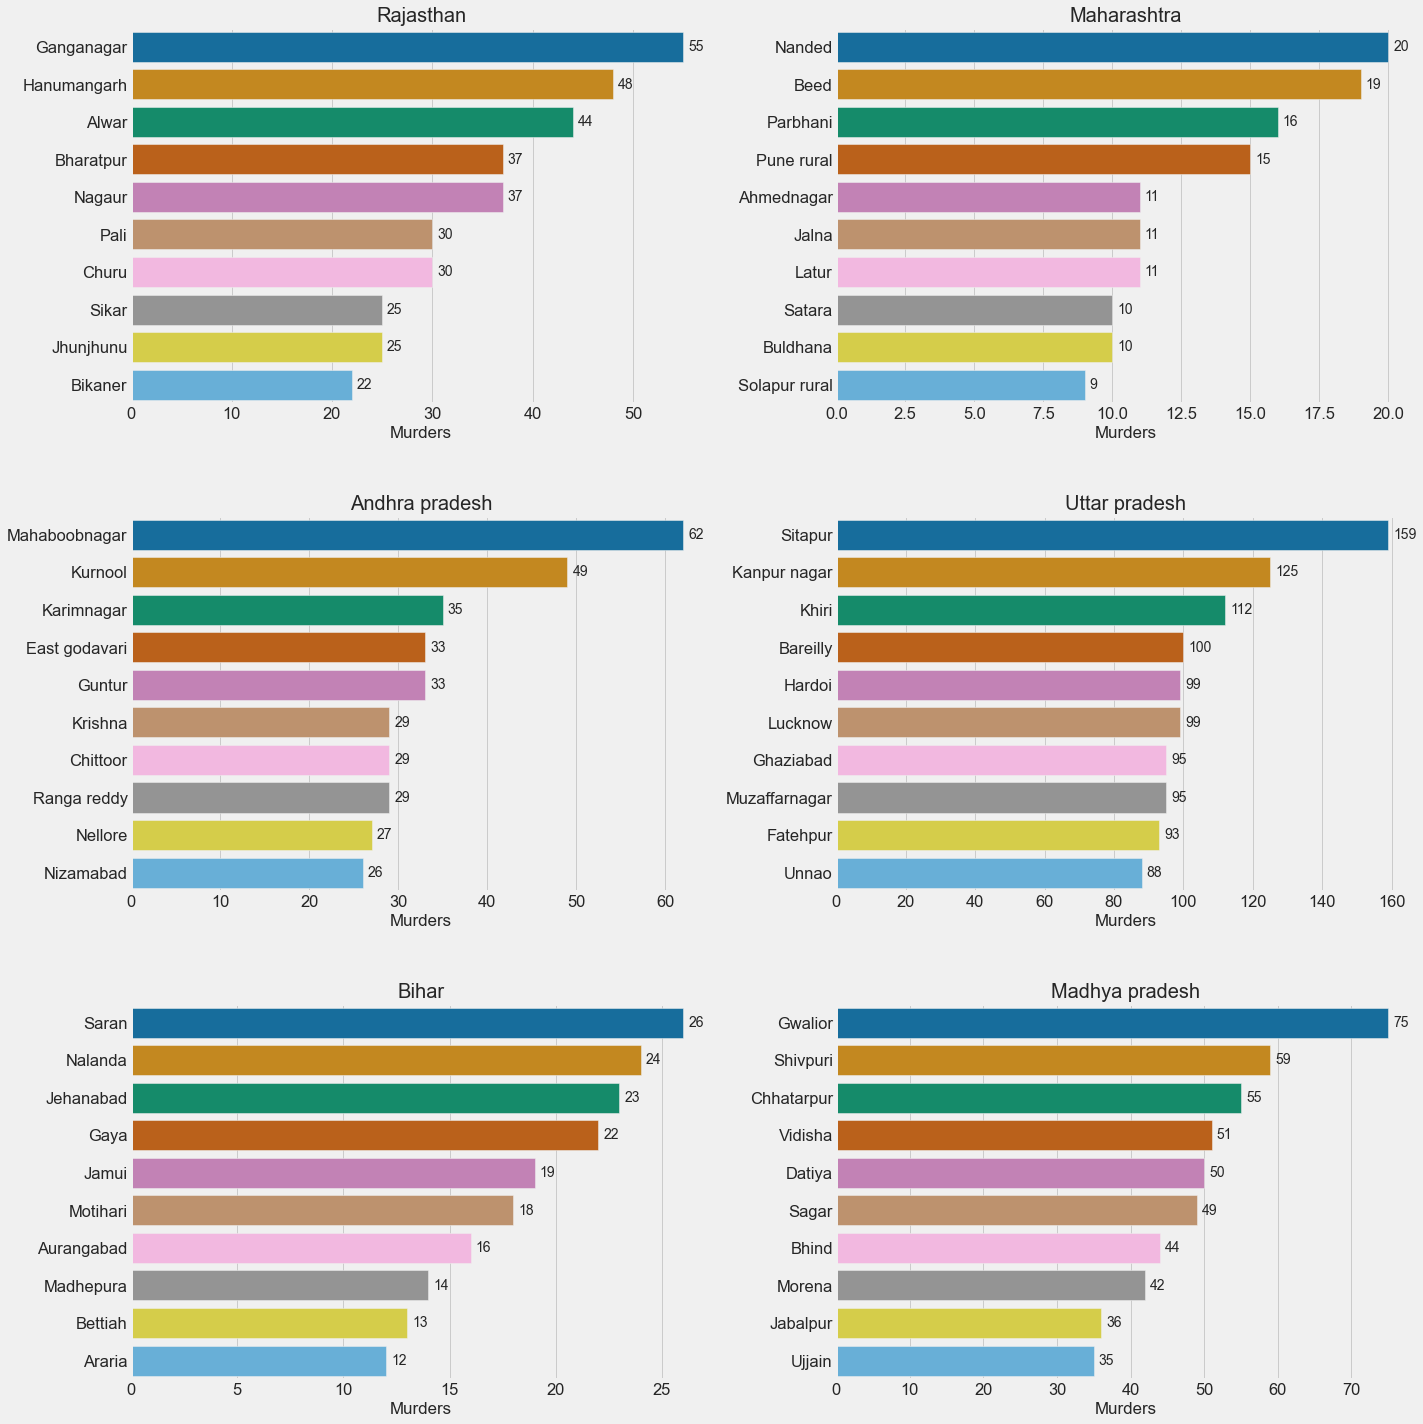

In [27]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Murder', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Murder' ,y= 'DISTRICT',palette = 'colorblind' )
    plt.xlabel('Murders')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Number of cases of Hurt in 6 states

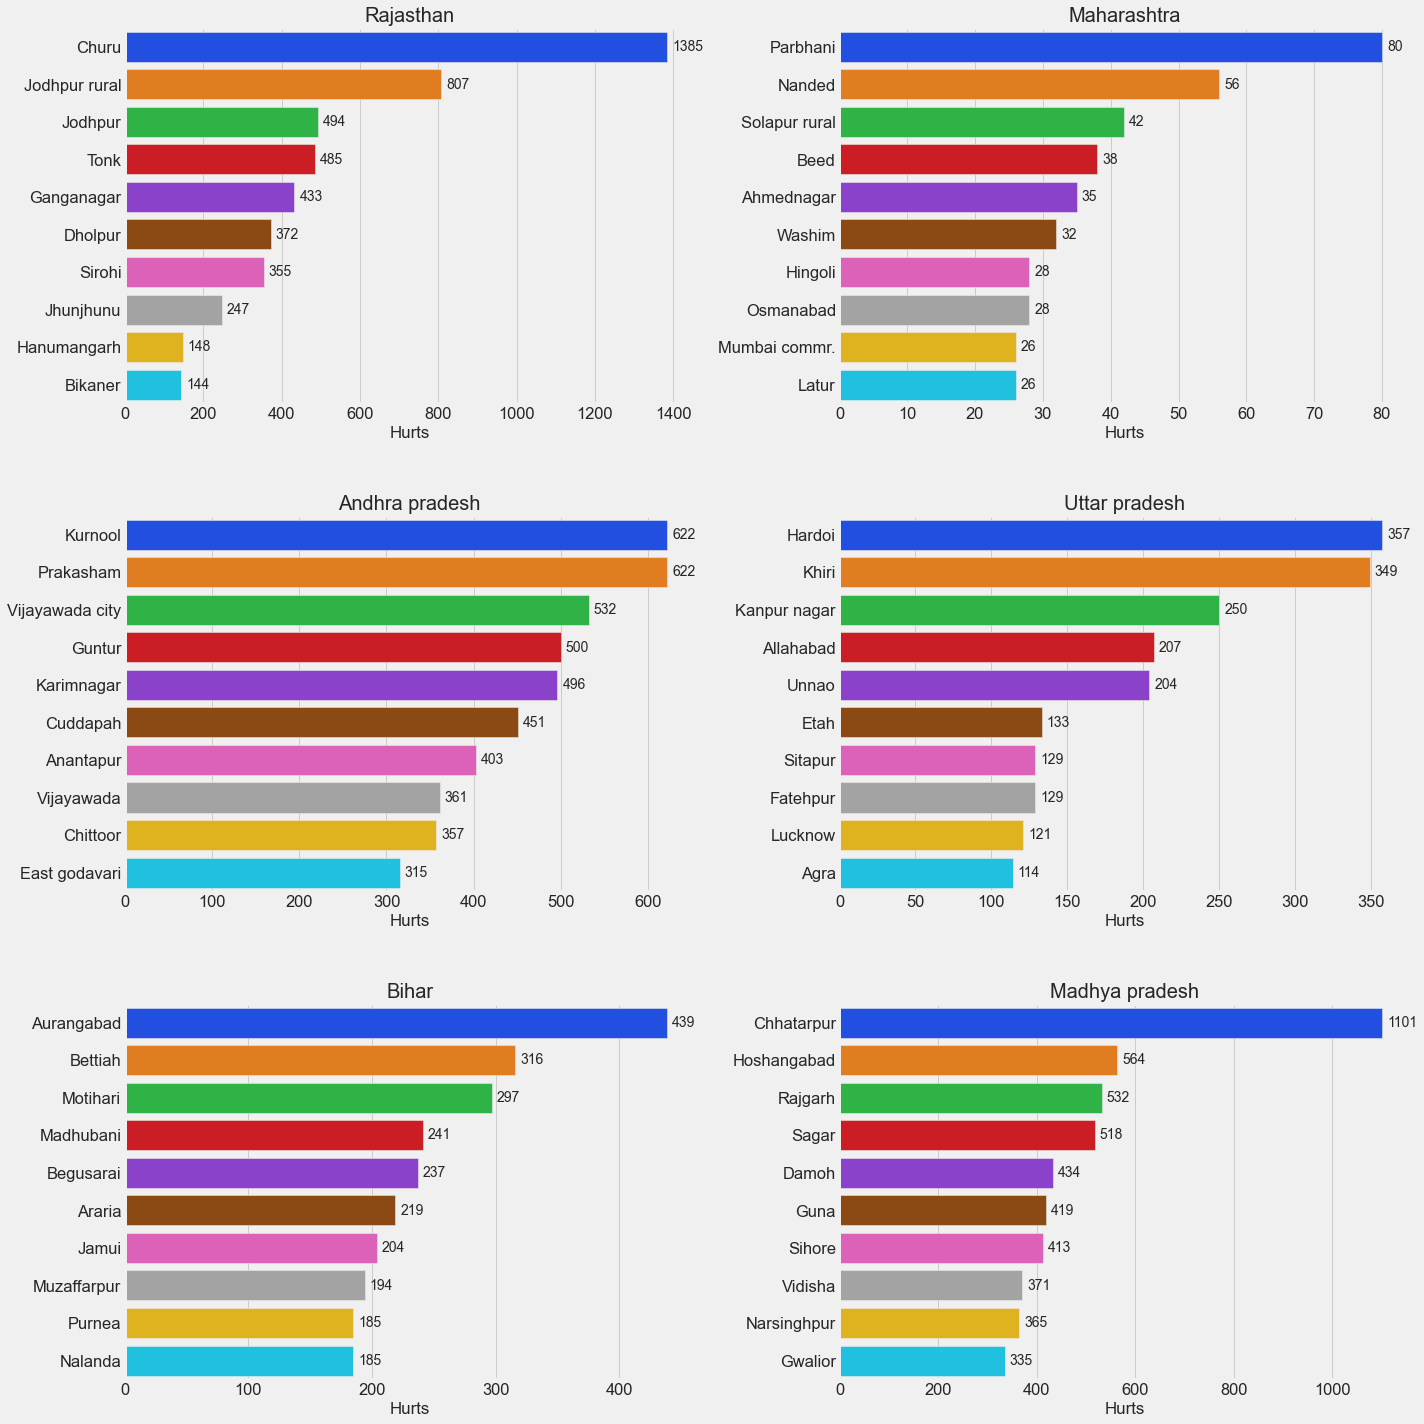

In [28]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Hurt', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Hurt' ,y= 'DISTRICT', palette = 'bright')
    plt.xlabel('Hurts')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Number of cases of Atrocities in 6 states

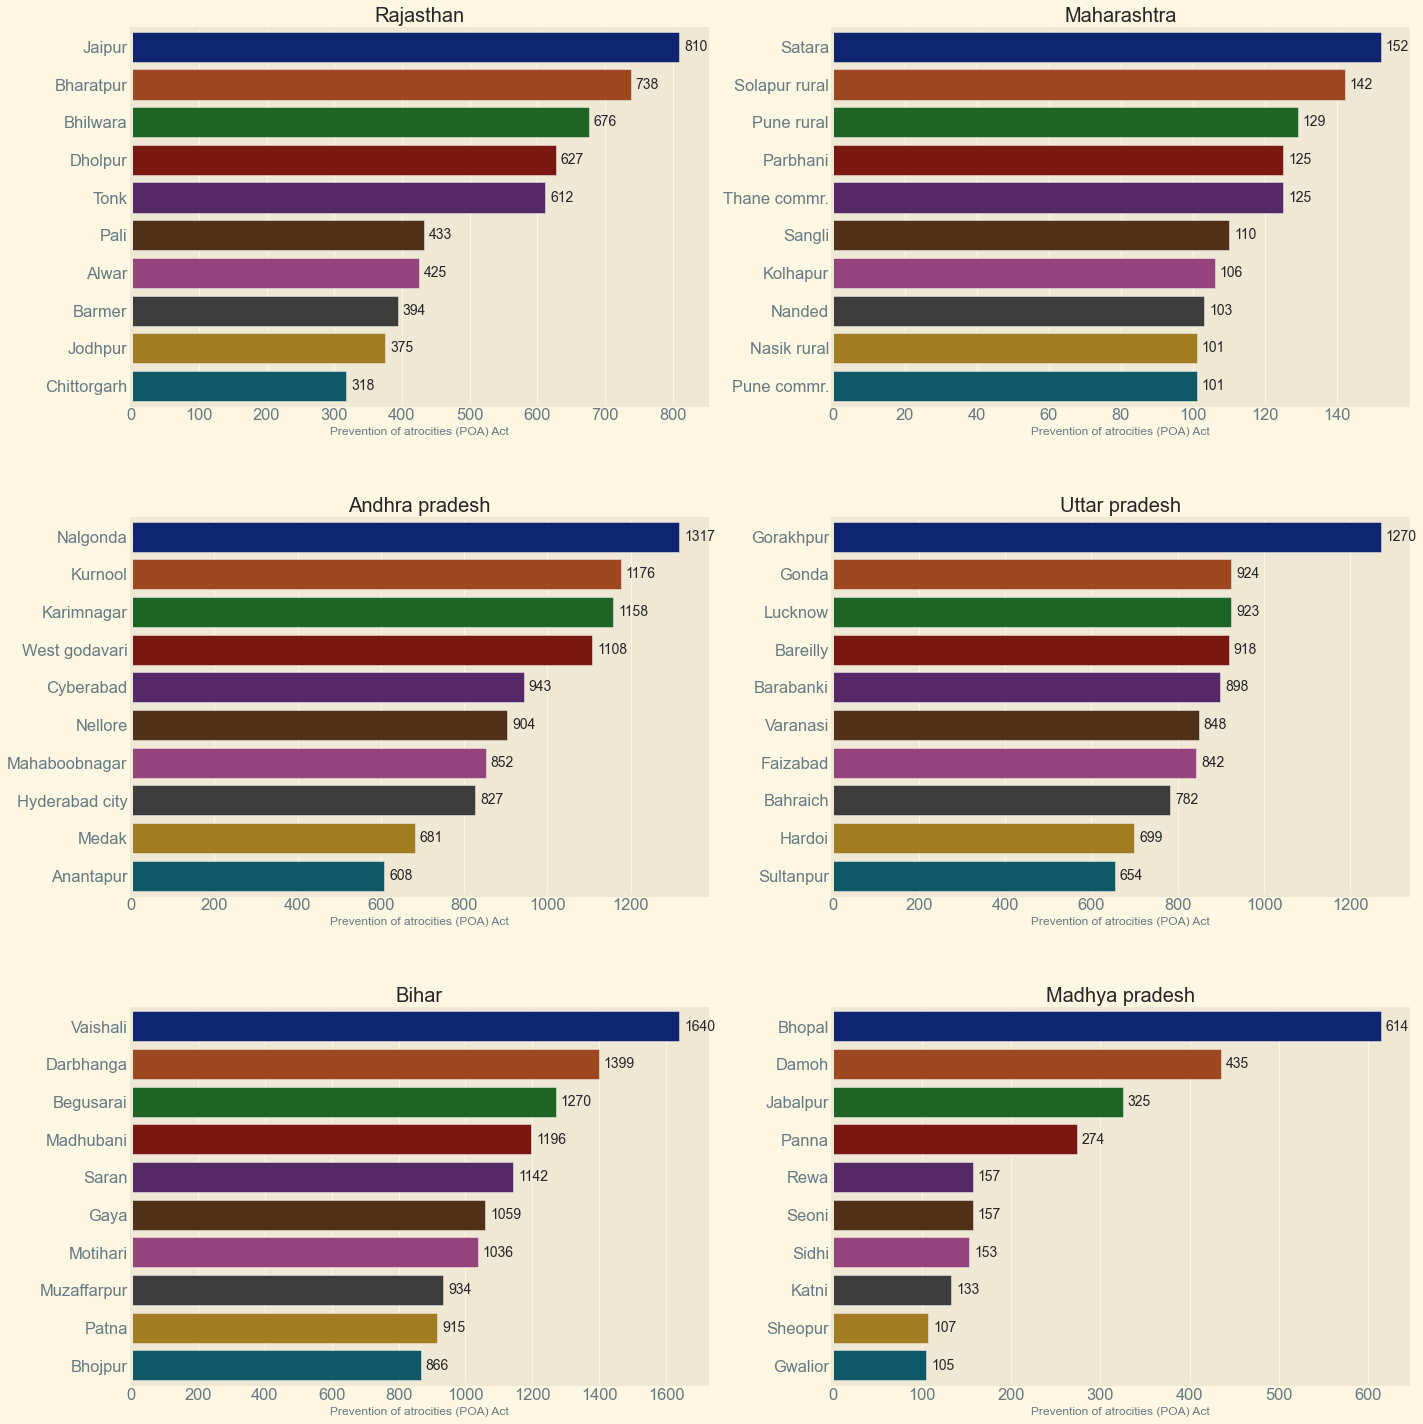

In [29]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Prevention of atrocities (POA) Act', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Prevention of atrocities (POA) Act' ,y= 'DISTRICT', palette = 'dark' )
    plt.xlabel('Prevention of atrocities (POA) Act')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


# Number of cases of Hurts in 6 states

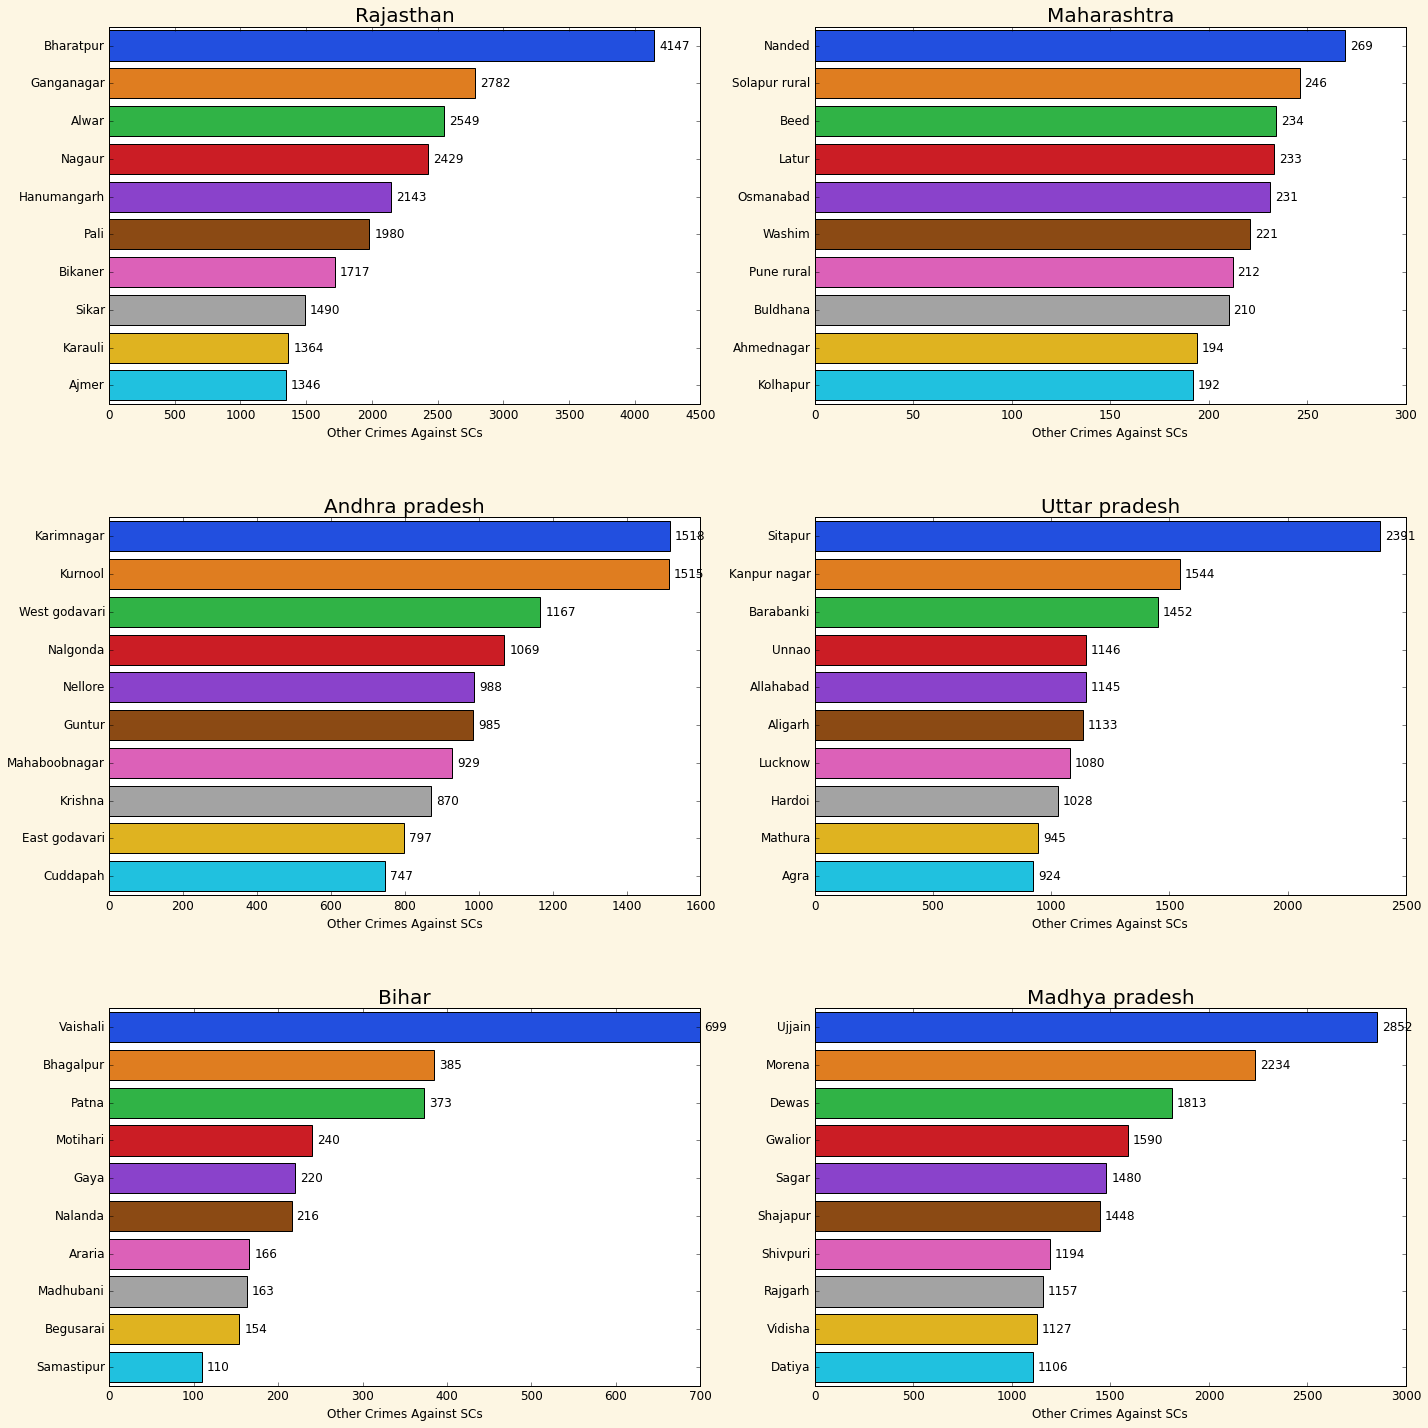

In [30]:
plt.figure(figsize=(20,20))
plt.style.use('classic')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Other Crimes Against SCs', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Other Crimes Against SCs' ,y= 'DISTRICT', palette = 'bright' )
    plt.xlabel('Other Crimes Against SCs')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Conclusion

Despite governments best effort the number of atrocities and hurt cases are increasing over the years. Rajasthan ,Uttarpradesh , Bihar ,Maharashtra and Rajasthan seem to be hotspot for crimes against Scs.

# Human rights violation by police

In [31]:
police_hr = pd.read_csv('35_Human_rights_violation_by_police.csv')

In [32]:
police_hr.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0


In [33]:
police_hr.groupby('Sub_Group_Name').agg({'Area_Name':'count'}).sort_values(by='Area_Name',ascending=False)

,Area_Name
Sub_Group_Name,
12. Total (Sum of 1-11 Above),214
11. Others,194
01. Disappearance of Persons,190
05. Extortion,190
06. Torture,190
10. Atrocities on SC/ST,188
02. Illegal Detention/Arrests,186
03. Fake Encounter Killings,185
09. Indignity to Women,185


In [34]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Torture                                    190
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Indignity to Women                         185
HR_Fake encounter killings                    185
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

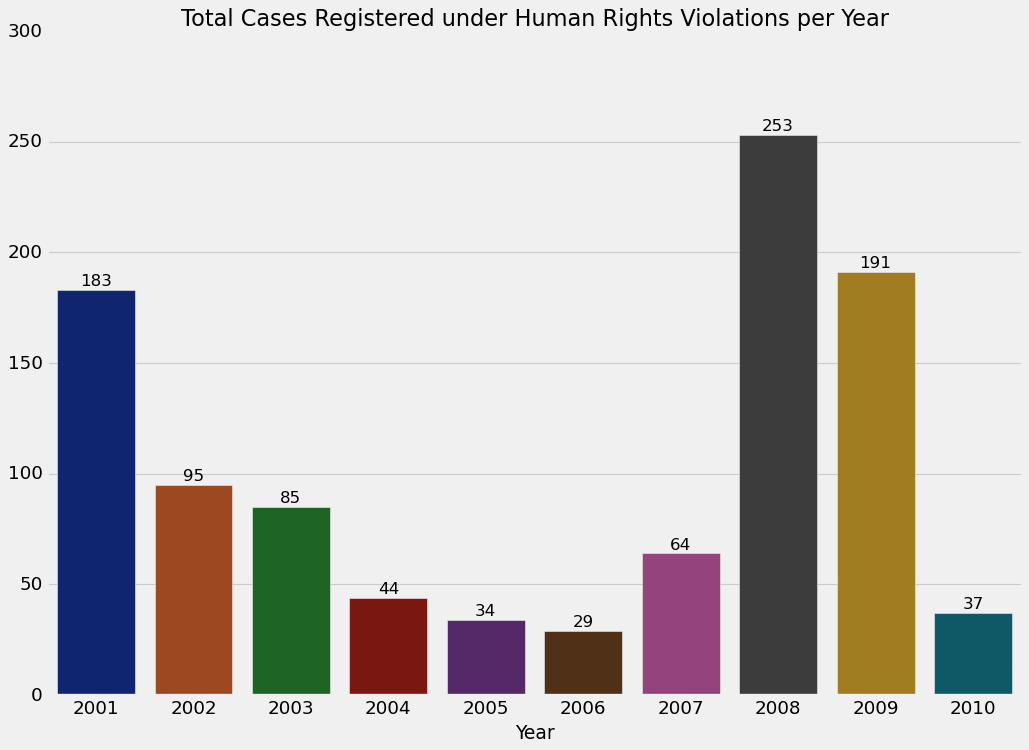

In [35]:
p1 = police_hr[police_hr['Sub_Group_Name']== '12. Total (Sum of 1-11 Above)']  #keeping only total category of subgroup
p2 = p1.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index() #grouping
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
#sns.palplot(sns.color_palette("hls", 8))
ax = sns.barplot(x = 'Year' , y = 'Cases_Registered_under_Human_Rights_Violations' , data = p2 ,palette= 'dark') #plotting bar graph
plt.title("Total Cases Registered under Human Rights Violations per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

In 2008, highest number of cases were recorded - 506
The year 2006 recorded least number of cases i.e 58842


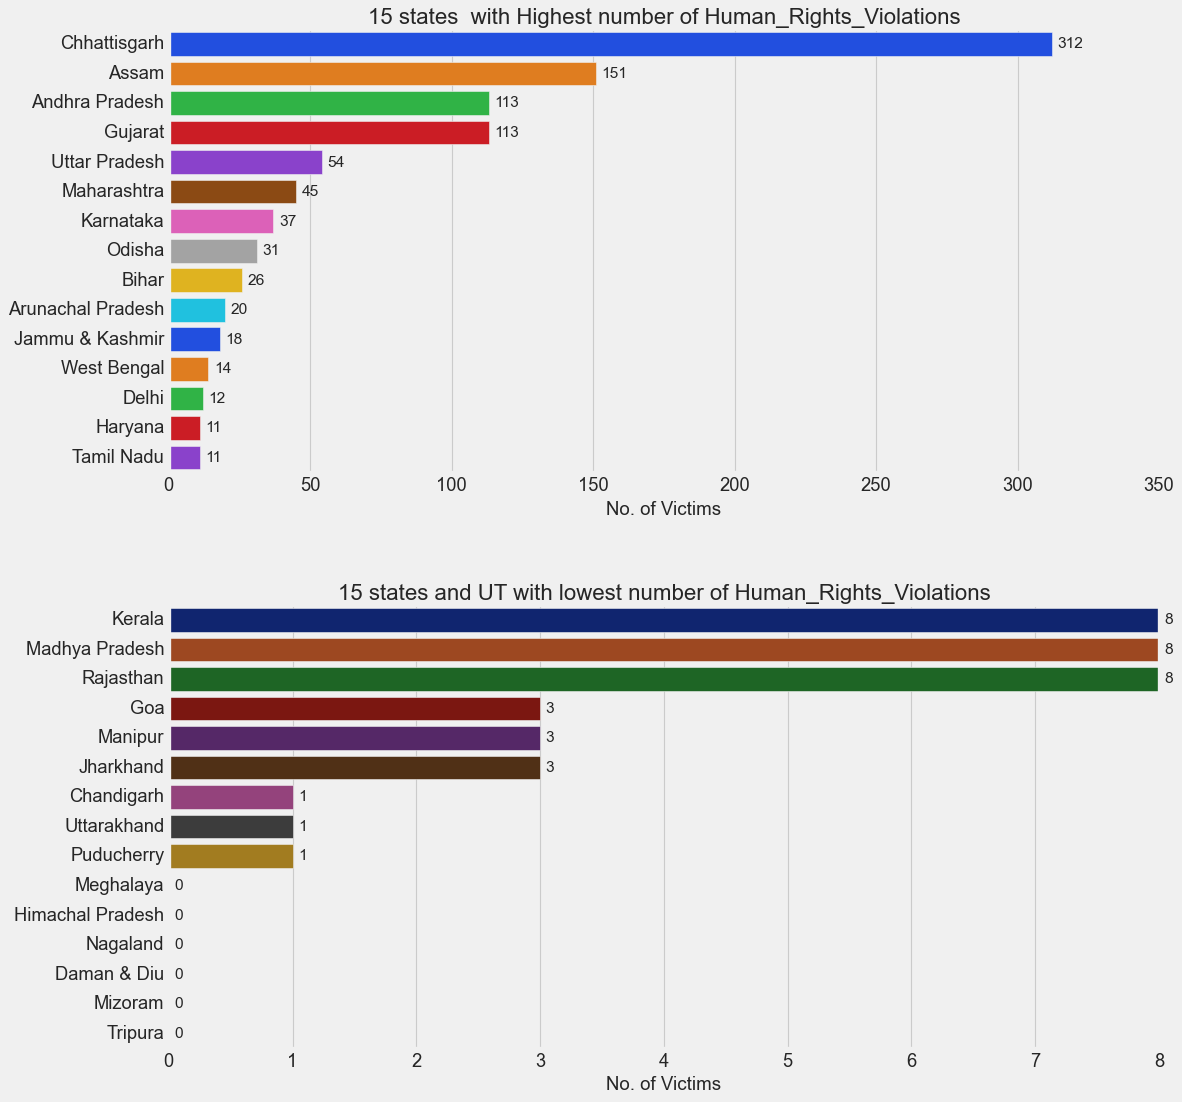

In [36]:
p3 = police_hr[police_hr['Sub_Group_Name']== '12. Total (Sum of 1-11 Above)']  #we need only total number of victims per state
p3 = p3.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().sort_values(ascending = False).reset_index()
 
p3bad = p3.head(15) #top highest states
p3good = p3.tail(15) #top lowest states/ut

#sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

f , axes = plt.subplots(2,1, figsize = (15,14))
ax = sns.barplot(x = 'Cases_Registered_under_Human_Rights_Violations' , y = 'Area_Name' , data = p3bad, ax = axes[0],palette= 'bright') #barplot for highest numbers of victims per state
axes[0].set_title("15 states  with Highest number of Human_Rights_Violations", size = 20)
axes[0].set_ylabel('')
axes[0].set_xlabel('No. of Victims')
ax1 = sns.barplot(x = 'Cases_Registered_under_Human_Rights_Violations' , y = 'Area_Name' , data = p3good, ax = axes[1],palette= 'dark' )#barplot for lowest numbers of victims per state
axes[1].set_title("15 states and UT with lowest number of Human_Rights_Violations", size = 20)
axes[1].set_ylabel('')
axes[1].set_xlabel('No. of Victims')
plt.tight_layout()  #tight layout so that subplots look fitted
plt.subplots_adjust(hspace= .3) #adjusting the space between the plots
#murders.to_csv('murder.csv',index=False)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

for p in ax1.patches:
        ax1.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

Top 3 states with highest number of cases against police Chhatisgrah, Assam and Andra Pradesh
Top 3 states with lowest number of cases against police Tripura, Mizoram and Daman & Diu


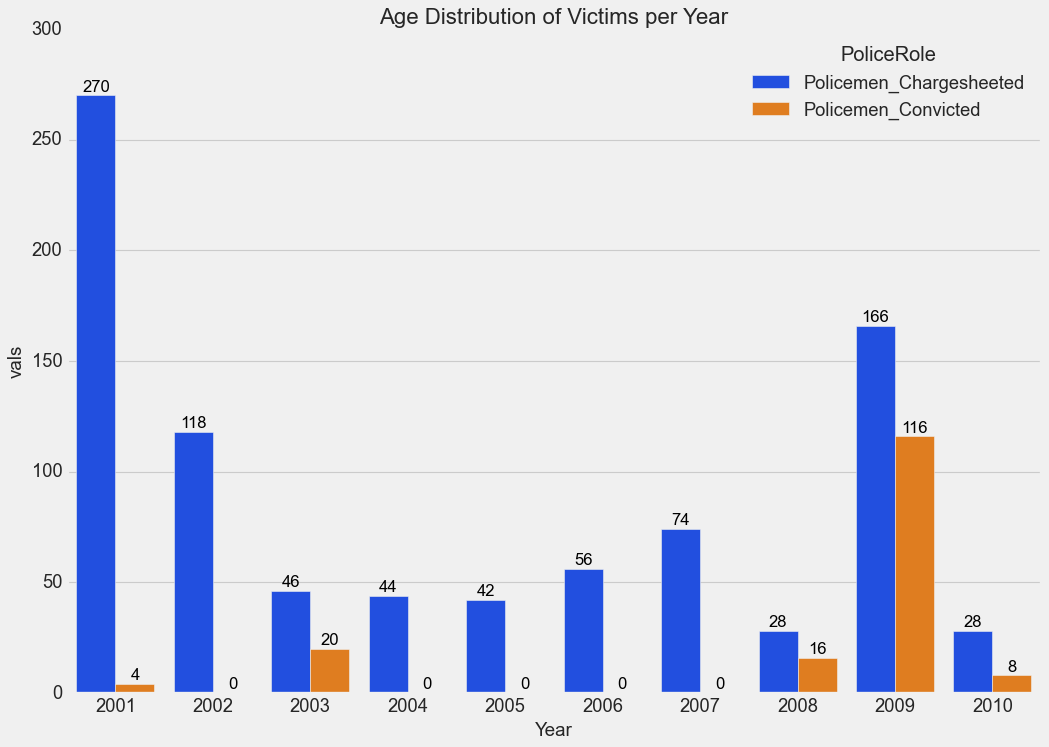

In [37]:
p4 = police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index()  #grouby year and age group
p4 = p4.melt('Year', var_name='PoliceRole',  value_name='vals') #melting the dataset
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',data = p4, hue = 'PoliceRole',palette= 'bright') #plotting a bar
plt.title('Age Distribution of Victims per Year',size = 20)
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')


In 2009, 69.87% of policemen have been convicted - highest of the decade.
For about three consecutive years, 2005, 2006, 2007 there has been no conviction of policemen.

# juveniles cases

In [38]:
juveniles = pd.read_csv('08_01_Juvenile_apprehended_state_IPC.csv')

In [39]:
juveniles.head()

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0


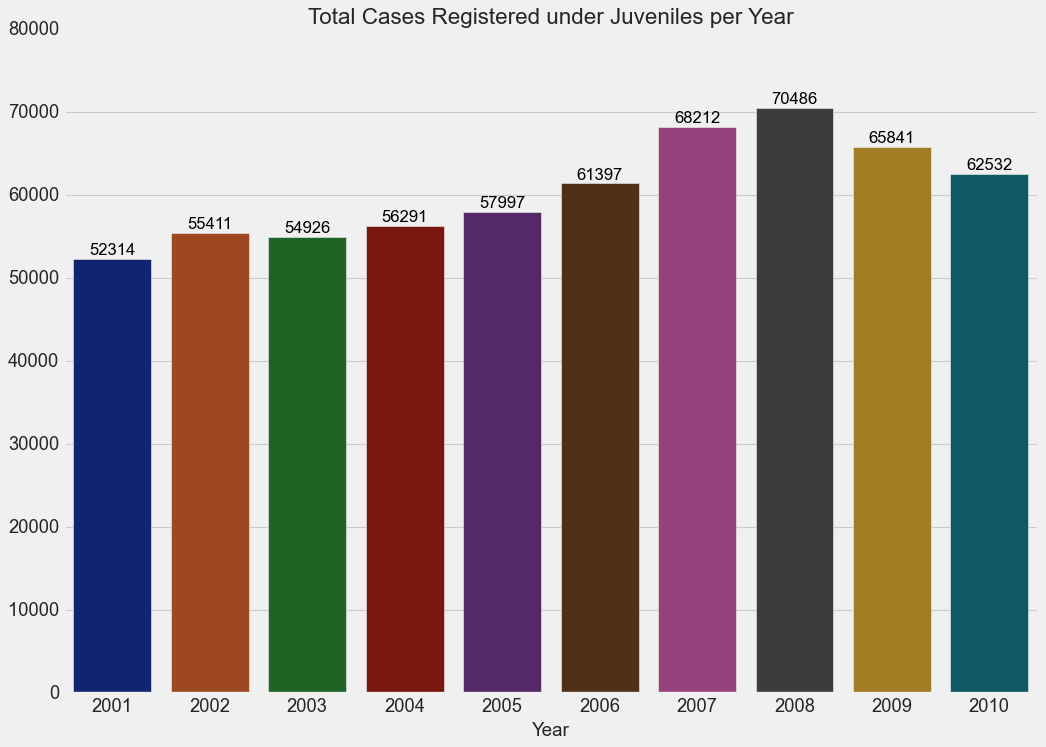

In [40]:
j1 = juveniles.groupby(['Year'])['Grand total'].sum().reset_index()
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'Grand total' , data = j1 ,palette= 'dark')
plt.title("Total Cases Registered under Juveniles per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

In 2008, highest number of cases were recorded. The year 2001 recorded least number of cases

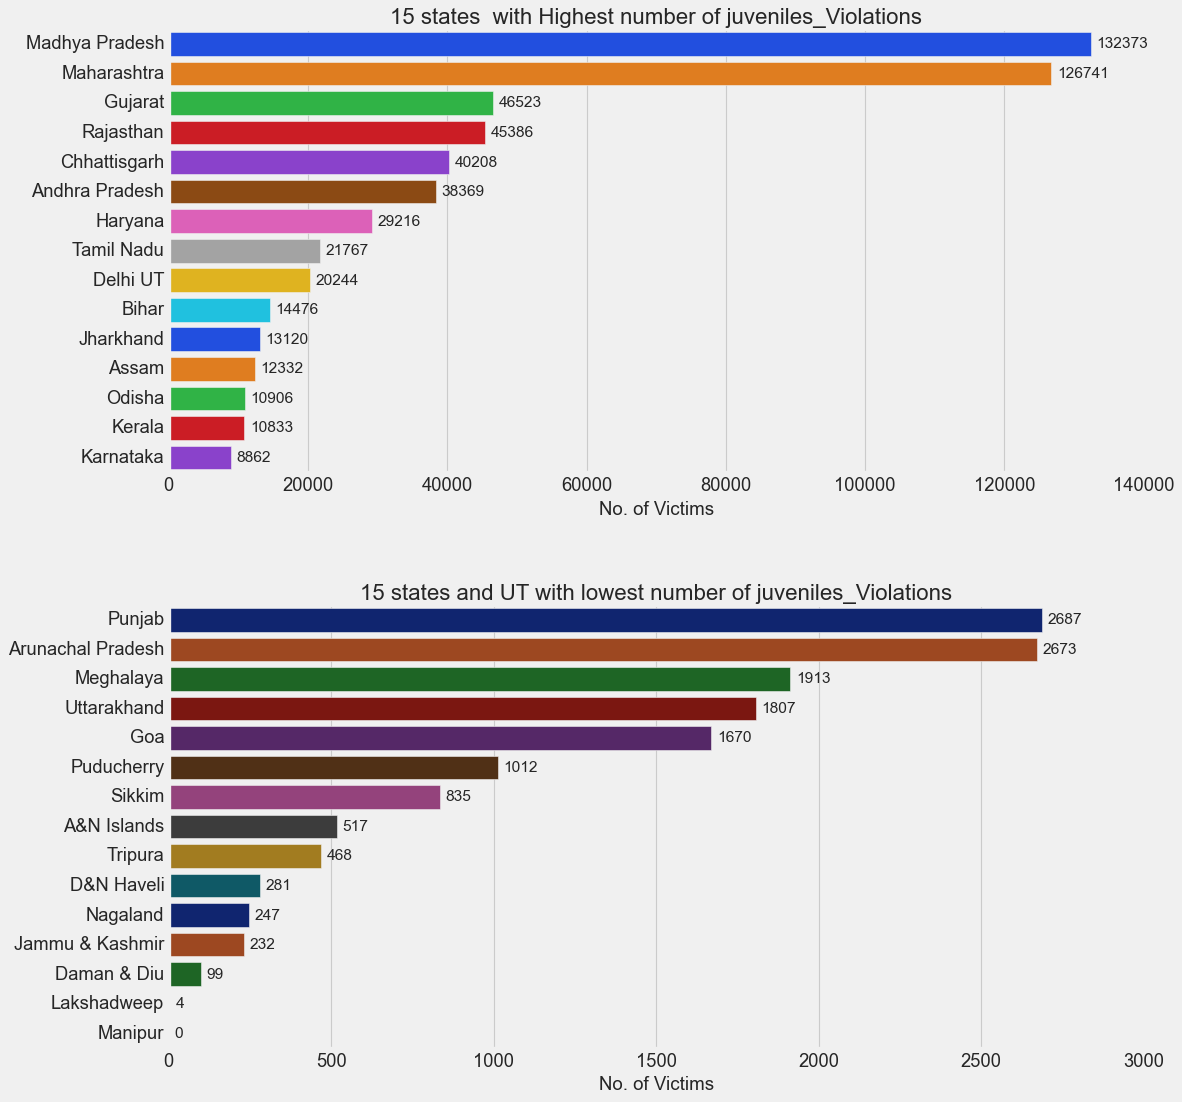

In [41]:
j2 = juveniles.groupby(['STATE/UT'])['Grand total'].sum().sort_values(ascending = False).reset_index()
 
j2bad = j2.head(15) 
j2good = j2.tail(15) 


sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

f , axes = plt.subplots(2,1, figsize = (15,14))
ax = sns.barplot(x = 'Grand total' , y = 'STATE/UT' , data = j2bad, ax = axes[0],palette= 'bright') 
axes[0].set_title("15 states  with Highest number of juveniles_Violations", size = 20)
axes[0].set_ylabel('')
axes[0].set_xlabel('No. of Victims')
ax1 = sns.barplot(x = 'Grand total' , y = 'STATE/UT' , data = j2good, ax = axes[1],palette= 'dark' )
axes[1].set_title("15 states and UT with lowest number of juveniles_Violations", size = 20)
axes[1].set_ylabel('')
axes[1].set_xlabel('No. of Victims')
plt.tight_layout()  
plt.subplots_adjust(hspace= .3) 
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

for p in ax1.patches:
        ax1.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

Top 3 states with highest number of cases against juveniles Madya Pradesh, Maharastra, Gujarat and Top 3 states with lowest number of cases against juveniles is Manipur, Lakshadeep and Daman & Diu

Text(0, 0.5, '')

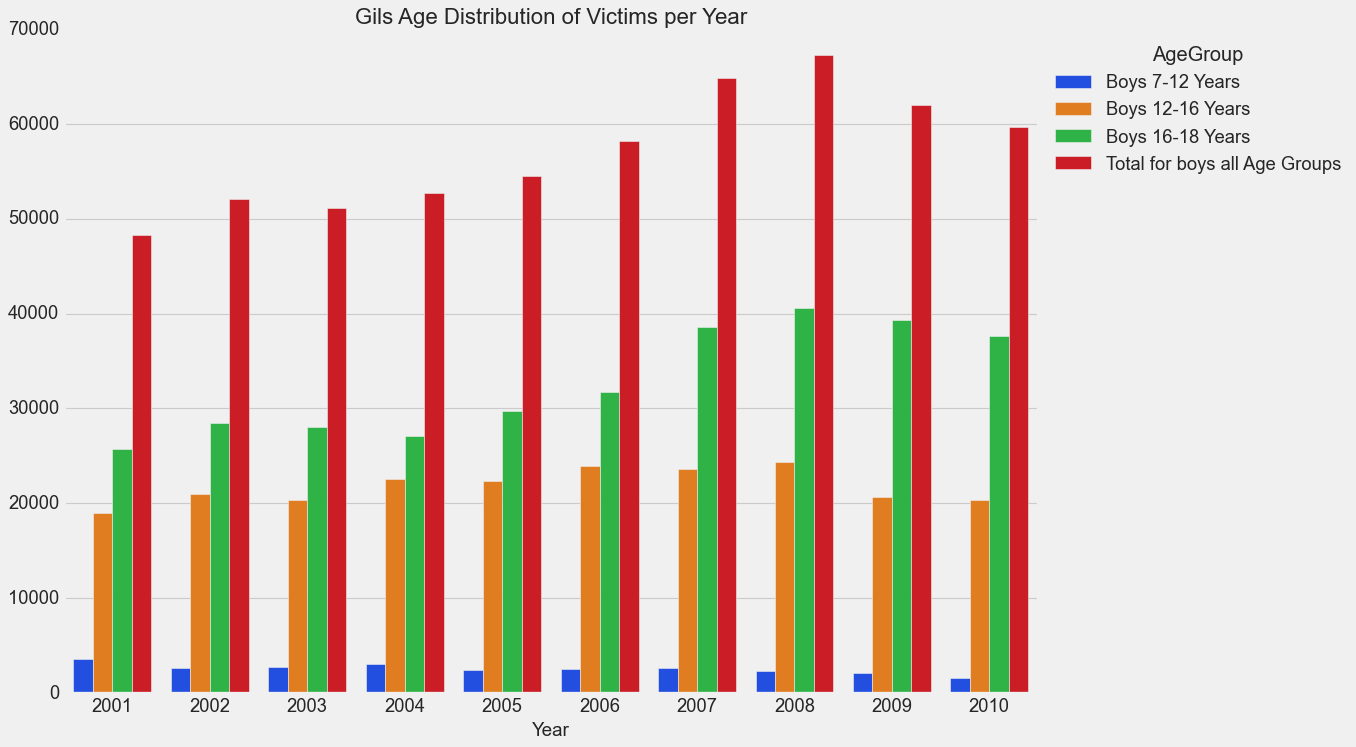

In [42]:
j3 = juveniles.groupby(['Year'])['Boys 7-12 Years','Boys 12-16 Years','Boys 16-18 Years',
                                   'Total for boys all Age Groups'].sum().reset_index() 
j3 = j3.melt('Year', var_name='AgeGroup',  value_name='vals') 

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = j3 ,palette= 'bright') 
plt.title('Gils Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.set_ylabel('')

Text(0, 0.5, '')

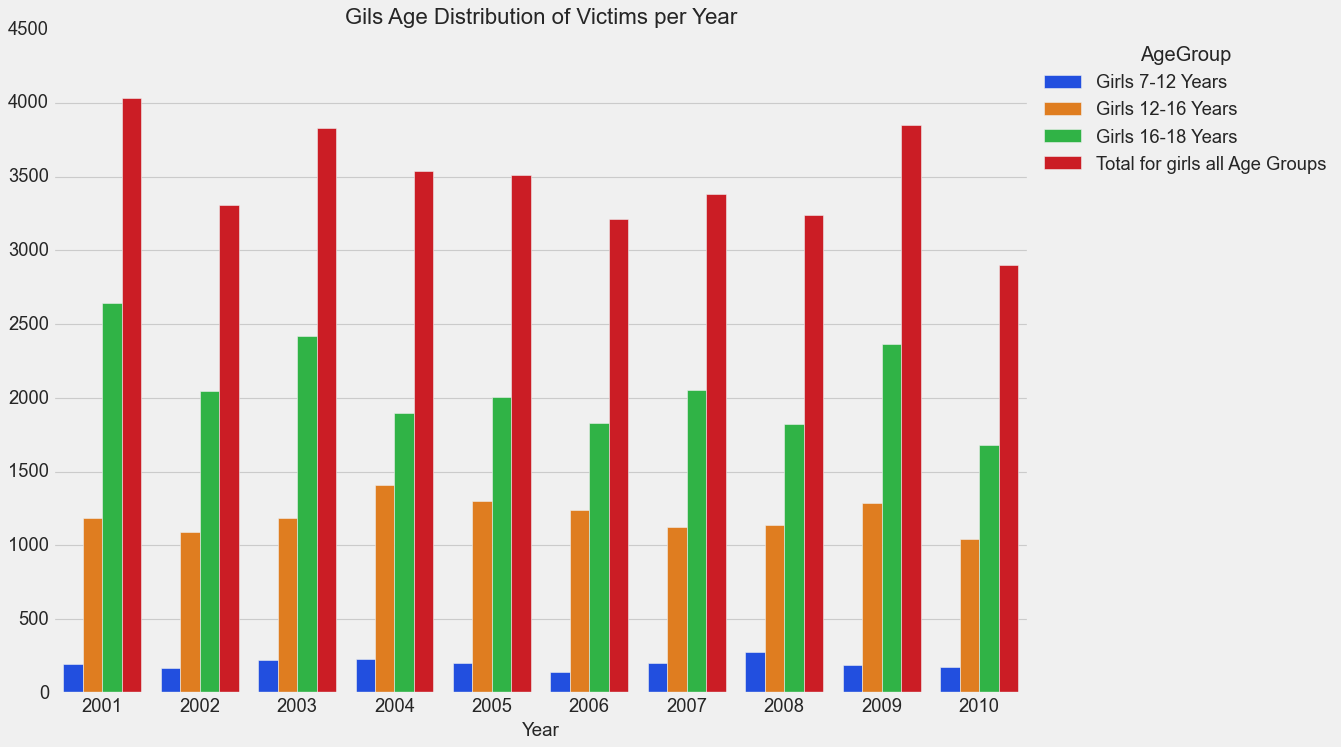

In [43]:
j4 = juveniles.groupby(['Year'])['Girls 7-12 Years','Girls 12-16 Years','Girls 16-18 Years',
                                   'Total for girls all Age Groups'].sum().reset_index()  
j4 = j4.melt('Year', var_name='AgeGroup',  value_name='vals') 

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = j4 ,palette= 'bright') 
plt.title('Gils Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) 
ax.set_ylabel('')

Text(0, 0.5, '')

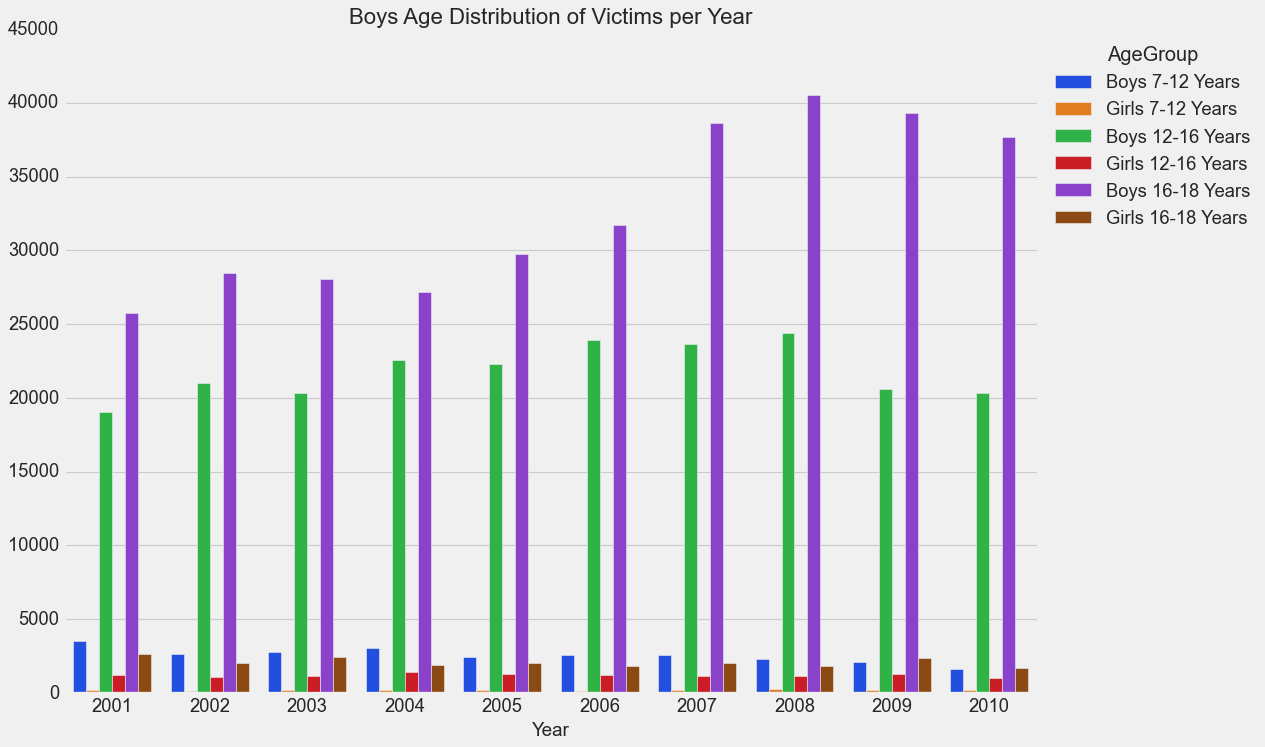

In [44]:
j5 = juveniles.groupby(['Year'])['Boys 7-12 Years','Girls 7-12 Years','Boys 12-16 Years','Girls 12-16 Years',
                                 'Boys 16-18 Years','Girls 16-18 Years'].sum().reset_index() 
j5 = j5.melt('Year', var_name='AgeGroup',  value_name='vals') 

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = j5 ,palette= 'bright') 
plt.title('Boys Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) 
ax.set_ylabel('')

Clearly shown Boys juvenile victims is more than girls

# Conclusion

Although country level State like Madya Pradesh, Maharastra, Gujarat has the high number of juvenile victims over the years and Top 3 states with lowest number of cases against juveniles is Manipur, Lakshadeep and Daman & Diuand the boy age group 16 - 18 is more unsafe